In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('D:\cds\musicdata.csv')

In [3]:
df

format            metric  year  number_of_records  value_actual
0               CD             Units  1973                  1           NaN
1               CD             Units  1974                  1           NaN
2               CD             Units  1975                  1           NaN
3               CD             Units  1976                  1           NaN
4               CD             Units  1977                  1           NaN
...            ...               ...   ...                ...           ...
3003  Vinyl Single  Value (Adjusted)  2015                  1      6.205390
3004  Vinyl Single  Value (Adjusted)  2016                  1      5.198931
3005  Vinyl Single  Value (Adjusted)  2017                  1      6.339678
3006  Vinyl Single  Value (Adjusted)  2018                  1      5.386197
3007  Vinyl Single  Value (Adjusted)  2019                  1      6.795946

[3008 rows x 5 columns]

In [4]:
df.describe()

year  number_of_records  value_actual
count  3008.000000             3008.0   1351.000000
mean   1996.000000                1.0    781.291237
std      13.566915                0.0   2246.837672
min    1973.000000                1.0     -7.650944
25%    1984.000000                1.0      3.700228
50%    1996.000000                1.0     63.900000
75%    2008.000000                1.0    448.900000
max    2019.000000                1.0  19667.327786

In [5]:
df.isnull().sum()

format                  0
metric                  0
year                    0
number_of_records       0
value_actual         1657
dtype: int64

In [6]:
df.dtypes

format                object
metric                object
year                   int64
number_of_records      int64
value_actual         float64
dtype: object

In [7]:
df.shape

(3008, 5)

In [8]:
df.describe(include="all")

format metric         year  number_of_records  value_actual
count    3008   3008  3008.000000             3008.0   1351.000000
unique     24      3          NaN                NaN           NaN
top        CD  Value          NaN                NaN           NaN
freq      141   1081          NaN                NaN           NaN
mean      NaN    NaN  1996.000000                1.0    781.291237
std       NaN    NaN    13.566915                0.0   2246.837672
min       NaN    NaN  1973.000000                1.0     -7.650944
25%       NaN    NaN  1984.000000                1.0      3.700228
50%       NaN    NaN  1996.000000                1.0     63.900000
75%       NaN    NaN  2008.000000                1.0    448.900000
max       NaN    NaN  2019.000000                1.0  19667.327786

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3008 entries, 0 to 3007
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   format             3008 non-null   object 
 1   metric             3008 non-null   object 
 2   year               3008 non-null   int64  
 3   number_of_records  3008 non-null   int64  
 4   value_actual       1351 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 117.6+ KB


In [10]:
clean_data = df.replace(np.nan,0)

In [11]:
clean_data

format            metric  year  number_of_records  value_actual
0               CD             Units  1973                  1      0.000000
1               CD             Units  1974                  1      0.000000
2               CD             Units  1975                  1      0.000000
3               CD             Units  1976                  1      0.000000
4               CD             Units  1977                  1      0.000000
...            ...               ...   ...                ...           ...
3003  Vinyl Single  Value (Adjusted)  2015                  1      6.205390
3004  Vinyl Single  Value (Adjusted)  2016                  1      5.198931
3005  Vinyl Single  Value (Adjusted)  2017                  1      6.339678
3006  Vinyl Single  Value (Adjusted)  2018                  1      5.386197
3007  Vinyl Single  Value (Adjusted)  2019                  1      6.795946

[3008 rows x 5 columns]

In [12]:
clean_data.describe()

year  number_of_records  value_actual
count  3008.000000             3008.0   3008.000000
mean   1996.000000                1.0    350.905738
std      13.566915                0.0   1554.835167
min    1973.000000                1.0     -7.650944
25%    1984.000000                1.0      0.000000
50%    1996.000000                1.0      0.000000
75%    2008.000000                1.0     35.417592
max    2019.000000                1.0  19667.327786

In [13]:
clean_data.shape

(3008, 5)

In [14]:
clean_data.info

<bound method DataFrame.info of             format            metric  year  number_of_records  value_actual
0               CD             Units  1973                  1      0.000000
1               CD             Units  1974                  1      0.000000
2               CD             Units  1975                  1      0.000000
3               CD             Units  1976                  1      0.000000
4               CD             Units  1977                  1      0.000000
...            ...               ...   ...                ...           ...
3003  Vinyl Single  Value (Adjusted)  2015                  1      6.205390
3004  Vinyl Single  Value (Adjusted)  2016                  1      5.198931
3005  Vinyl Single  Value (Adjusted)  2017                  1      6.339678
3006  Vinyl Single  Value (Adjusted)  2018                  1      5.386197
3007  Vinyl Single  Value (Adjusted)  2019                  1      6.795946

[3008 rows x 5 columns]>

In [15]:
clean_data.format.unique()

array(['CD', 'CD Single', 'Cassette', 'Cassette Single', 'LP/EP',
       'Vinyl Single', '8 - Track', 'Other Tapes',
       'Music Video (Physical)', 'DVD Audio', 'SACD', 'Download Single',
       'Download Album', 'Kiosk', 'Download Music Video',
       'Ringtones & Ringbacks', 'Paid Subscriptions',
       'Limited Tier Paid Subscription',
       'On-Demand Streaming (Ad-Supported)',
       'Other Ad-Supported Streaming', 'Other Digital',
       'Paid Subscription', 'SoundExchange Distributions',
       'Synchronization'], dtype=object)

In [16]:
clean_data.metric.unique()

array(['Units', 'Value', 'Value (Adjusted)'], dtype=object)

In [18]:
for i in clean_data.format.unique():
    print(i)
    print(clean_data[clean_data["format"] == i].format.count())
    print("-----")
print("--------------------------------------------------------------------")    
for j in clean_data.metric.unique():
    print(j)
    print(clean_data[clean_data["metric"] == j].metric.count())
    print("-----")

CD
141
-----
CD Single
141
-----
Cassette
141
-----
Cassette Single
141
-----
LP/EP
141
-----
Vinyl Single
141
-----
8 - Track
141
-----
Other Tapes
141
-----
Music Video (Physical)
141
-----
DVD Audio
141
-----
SACD
141
-----
Download Single
141
-----
Download Album
141
-----
Kiosk
141
-----
Download Music Video
141
-----
Ringtones & Ringbacks
141
-----
Paid Subscriptions
94
-----
Limited Tier Paid Subscription
94
-----
On-Demand Streaming (Ad-Supported)
94
-----
Other Ad-Supported Streaming
94
-----
Other Digital
94
-----
Paid Subscription
94
-----
SoundExchange Distributions
94
-----
Synchronization
94
-----
--------------------------------------------------------------------
Units
846
-----
Value
1081
-----
Value (Adjusted)
1081
-----


In [24]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

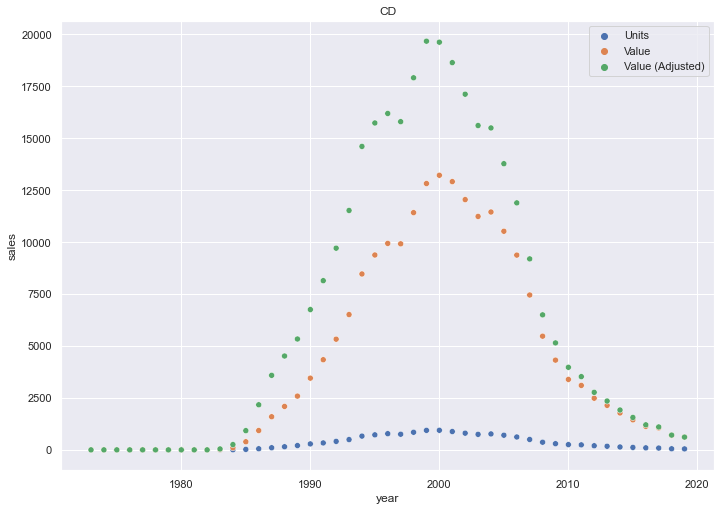

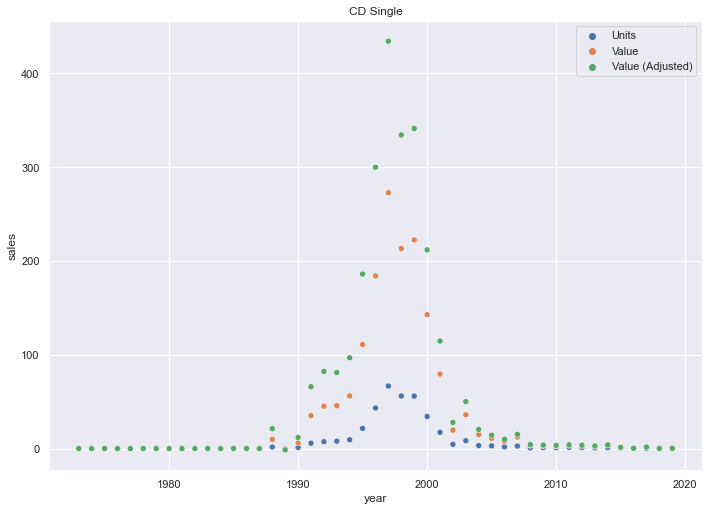

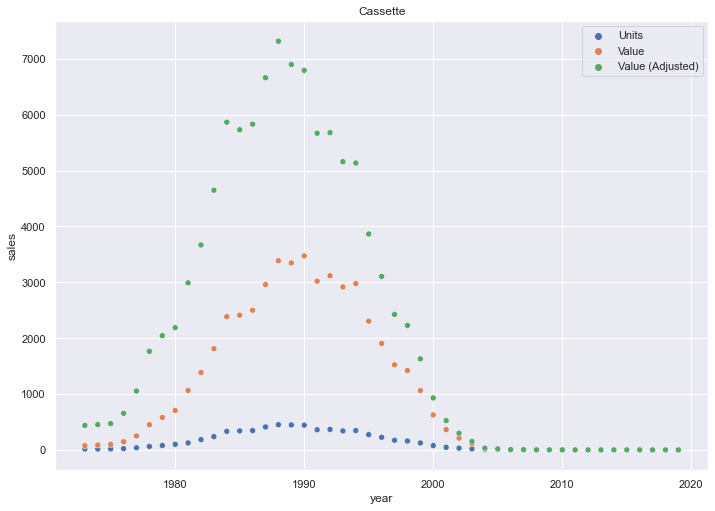

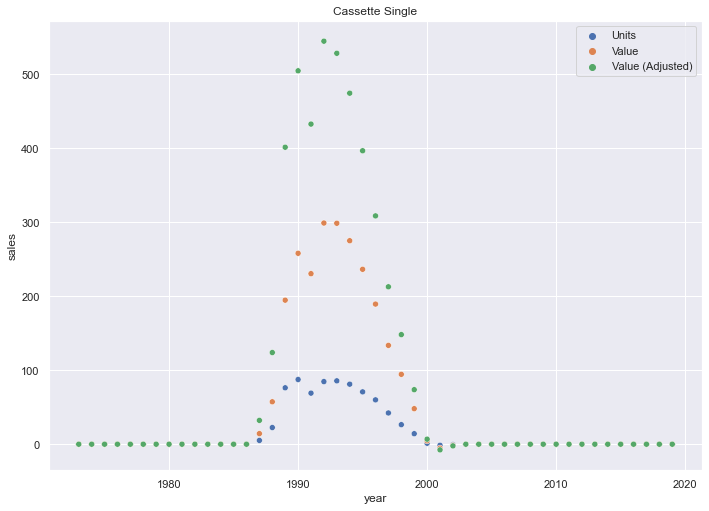

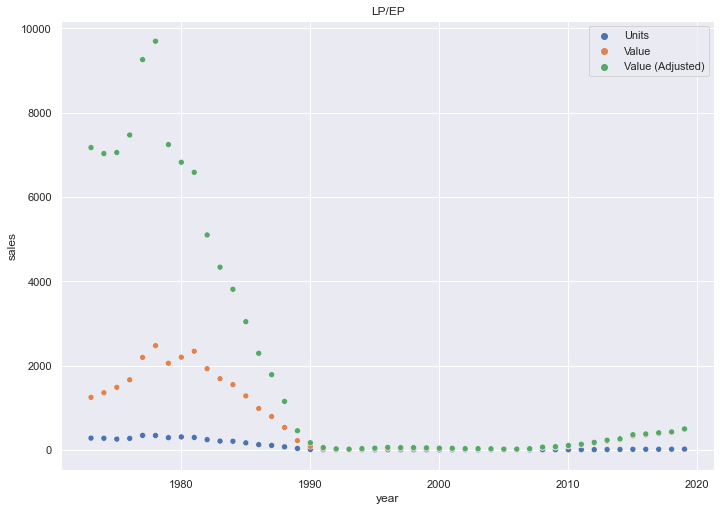

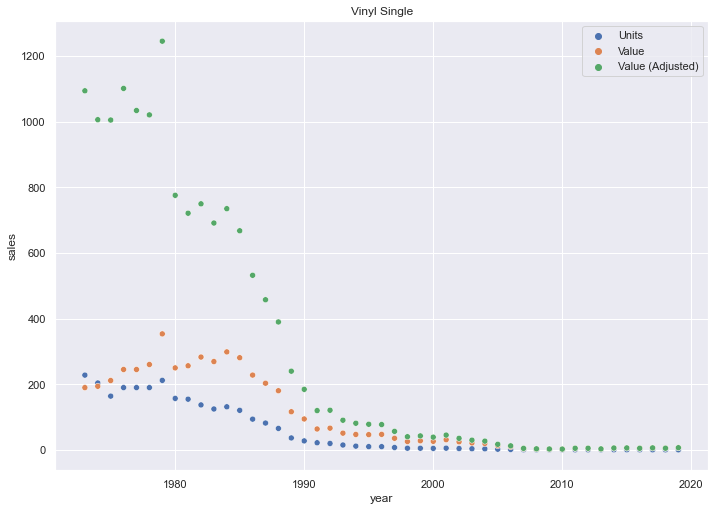

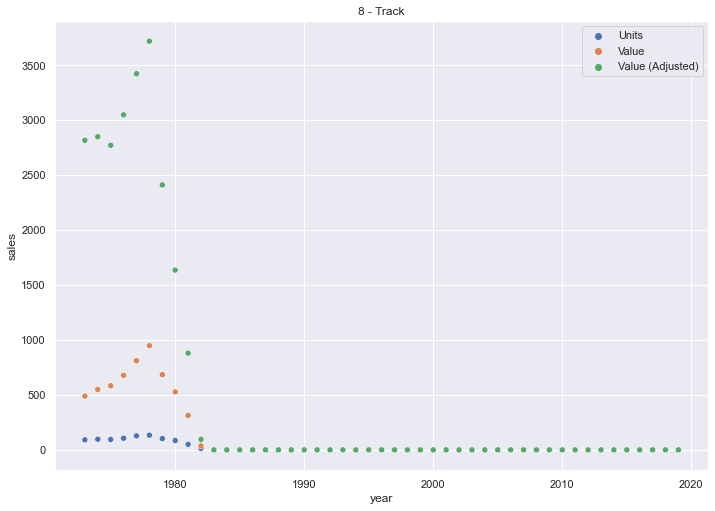

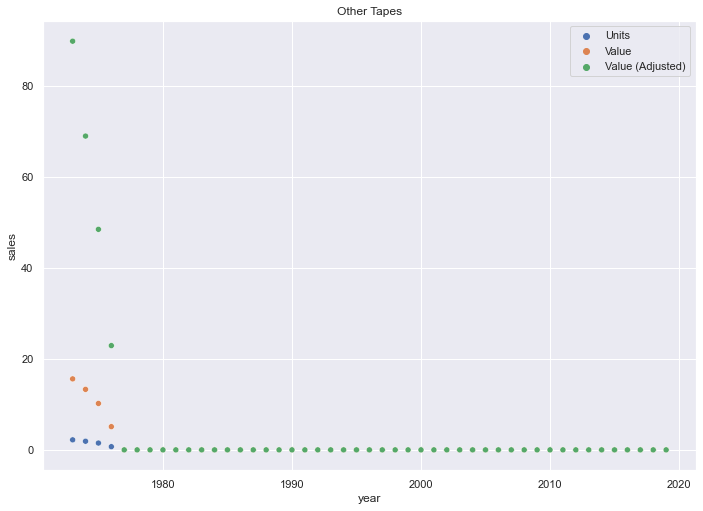

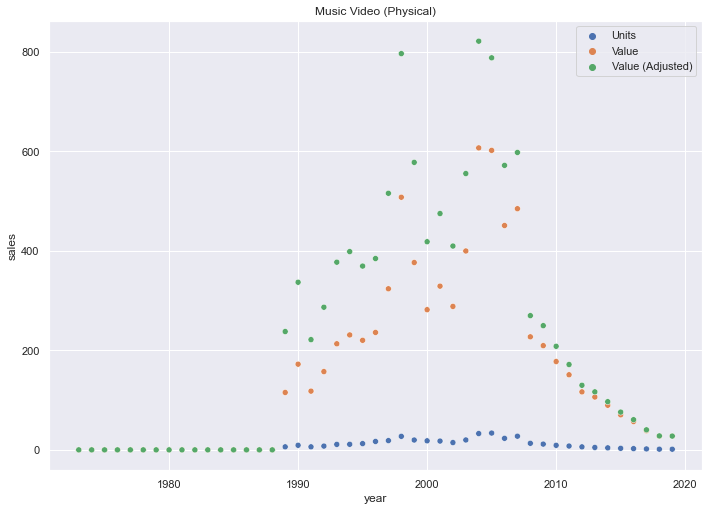

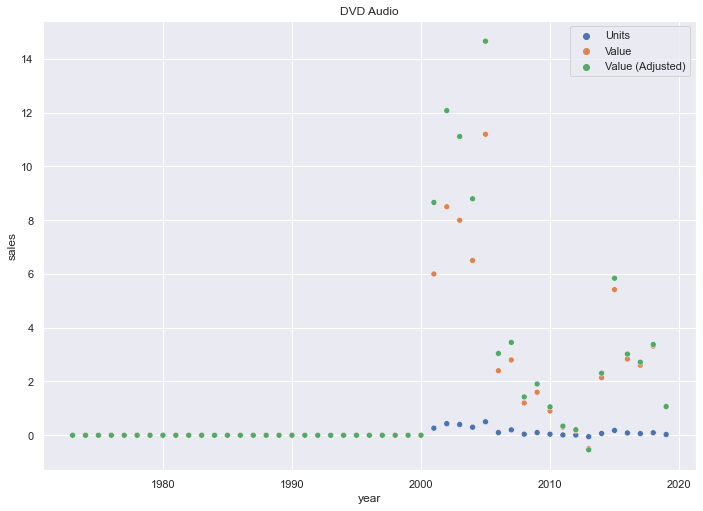

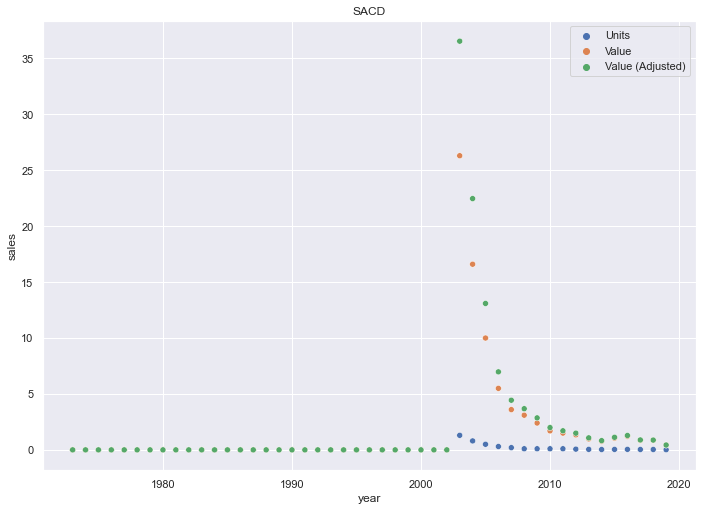

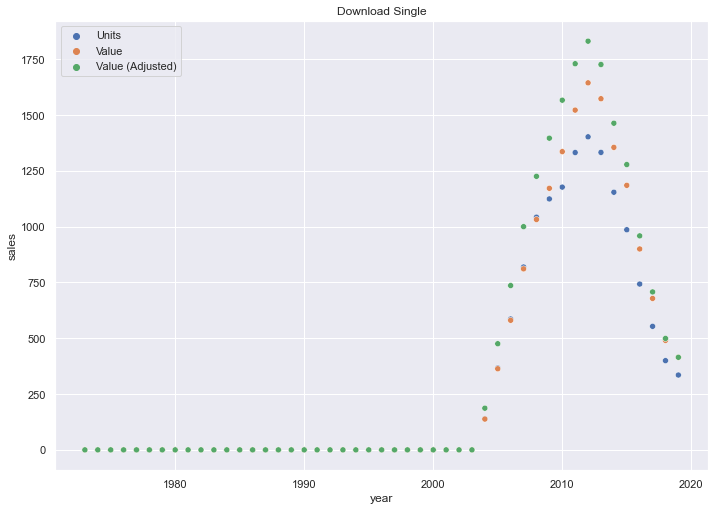

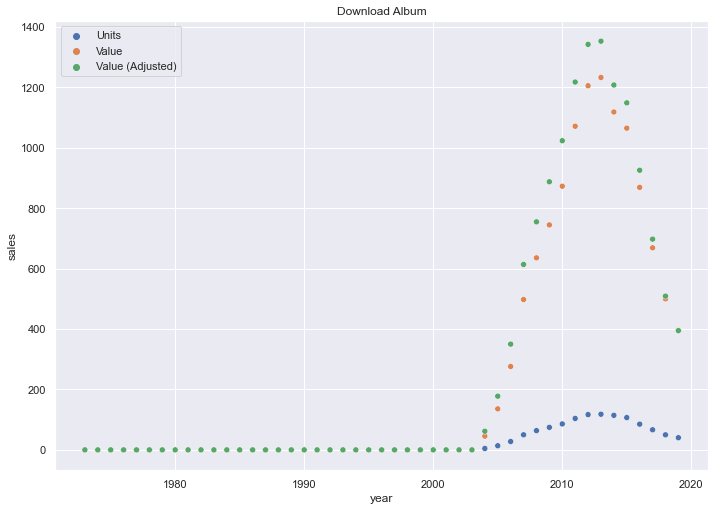

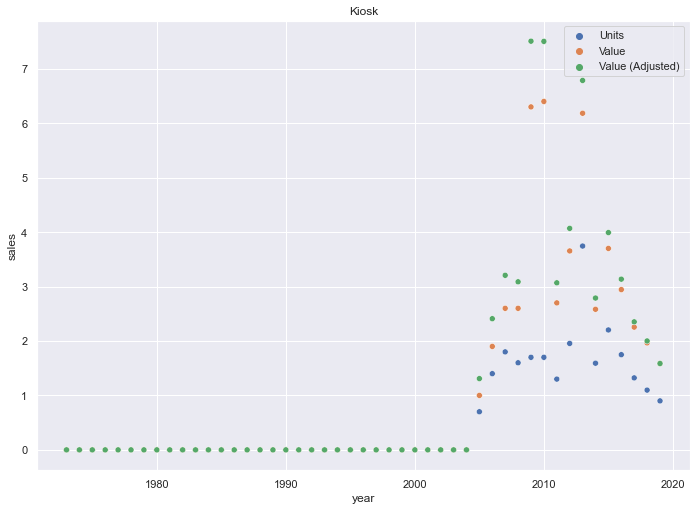

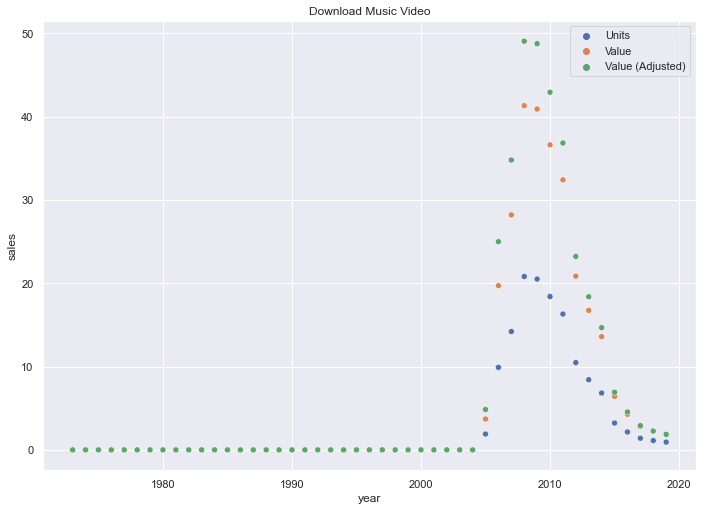

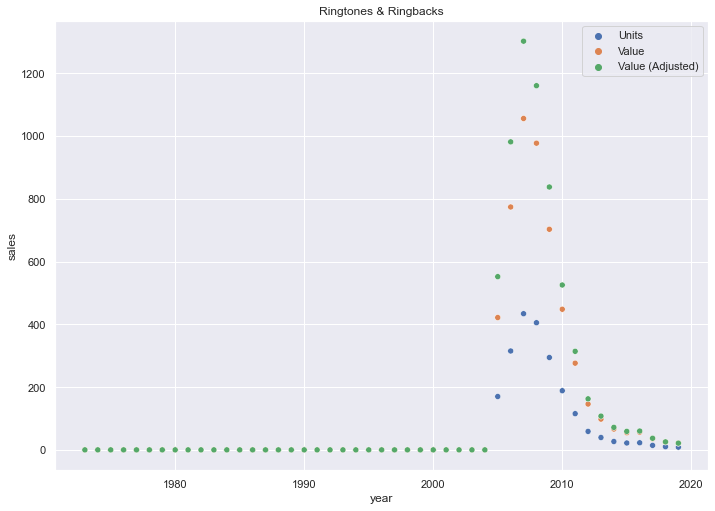

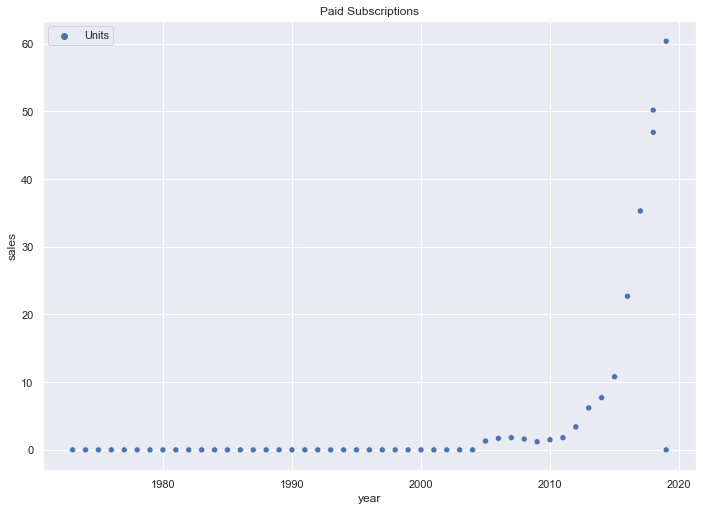

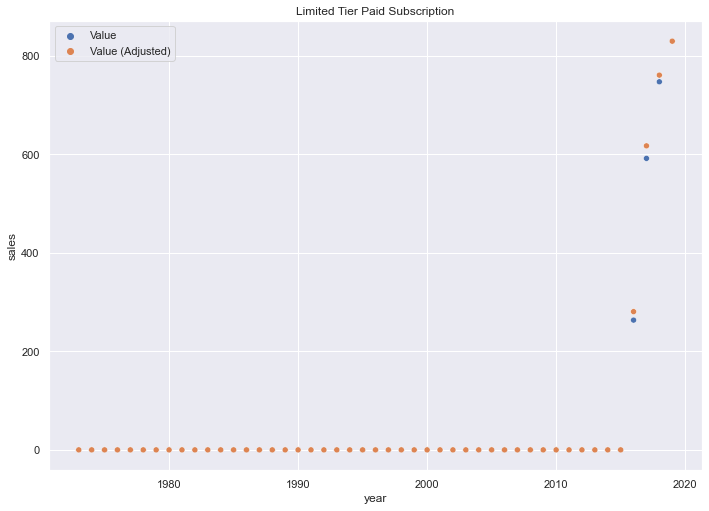

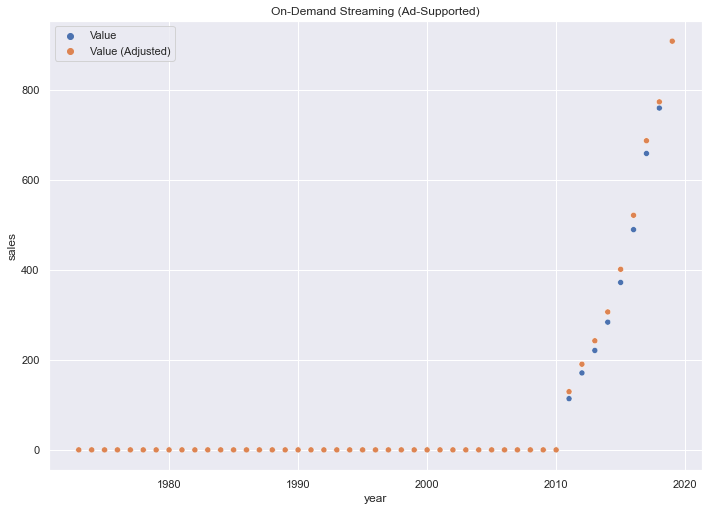

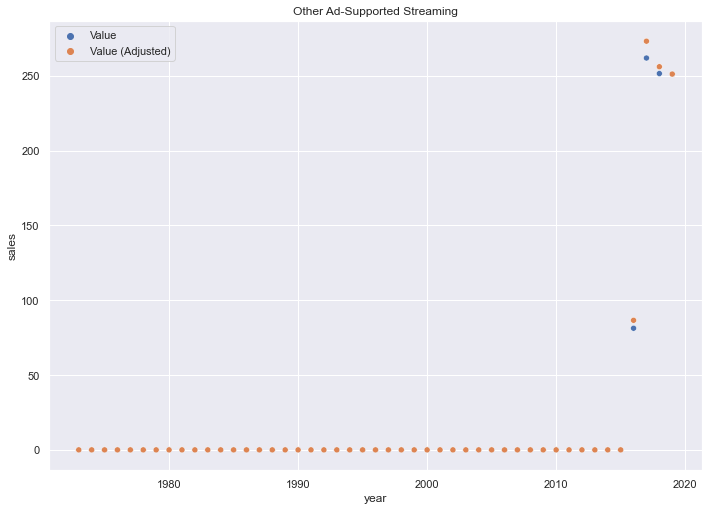

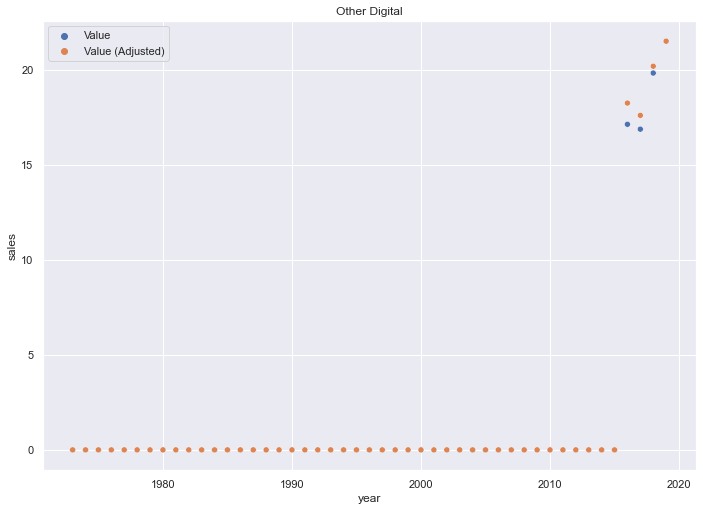

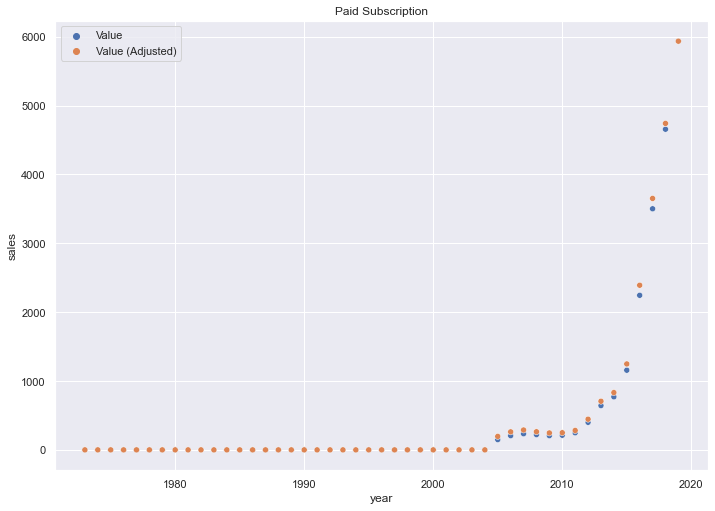

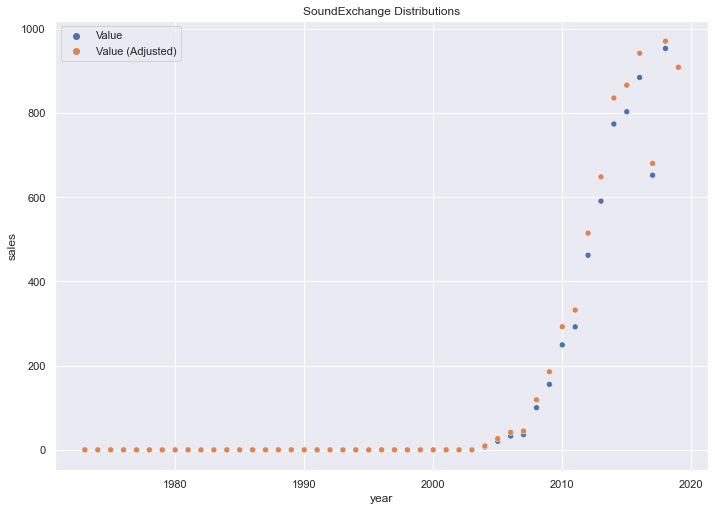

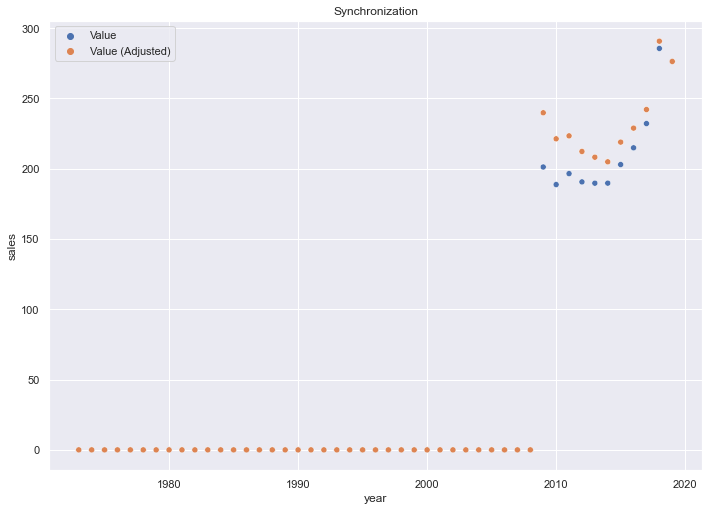

In [25]:
for k in clean_data.format.unique():
    fig, mr = plt.subplots()
    sns.scatterplot(data=clean_data[(clean_data["format"] == k)], x="year", y="value_actual", hue="metric")
    legend = mr.legend()
    plt.title(k)
    plt.xlabel("year")
    plt.ylabel("sales")
    plt.show()

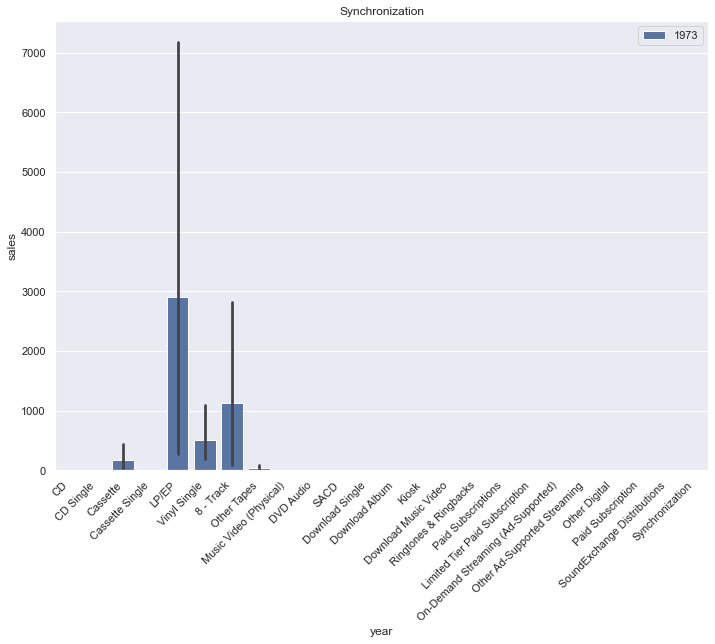

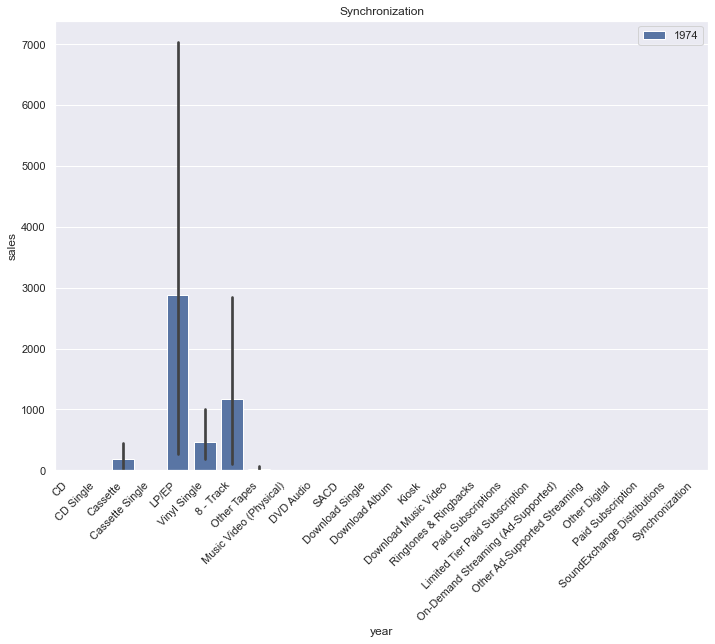

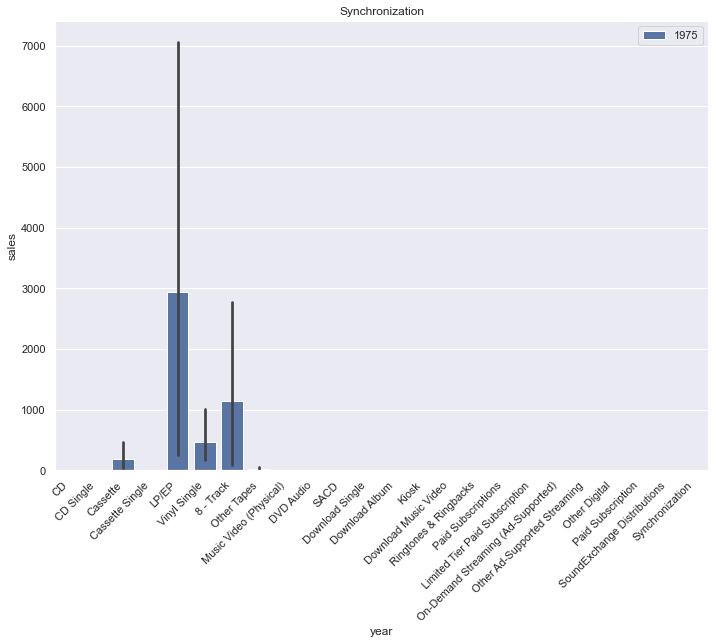

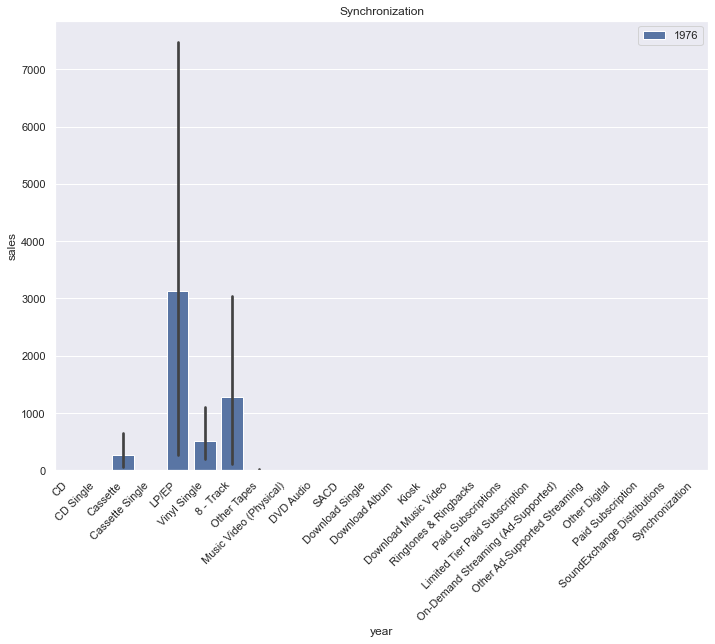

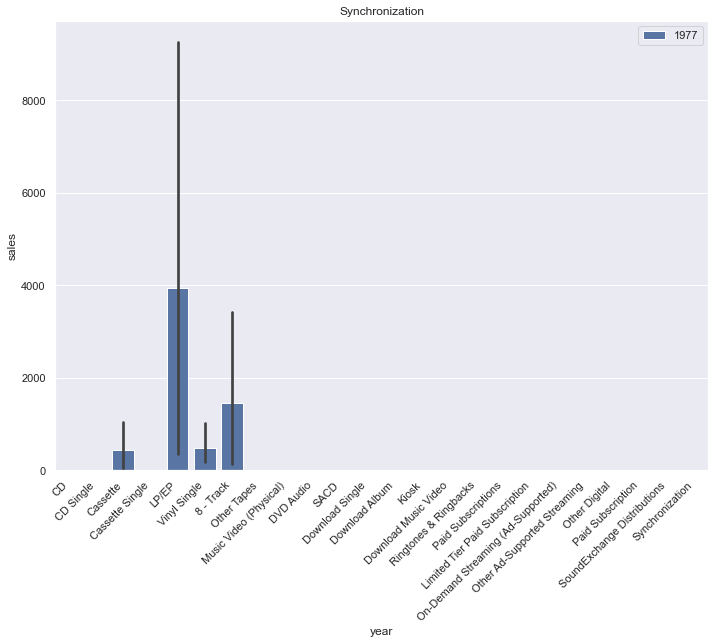

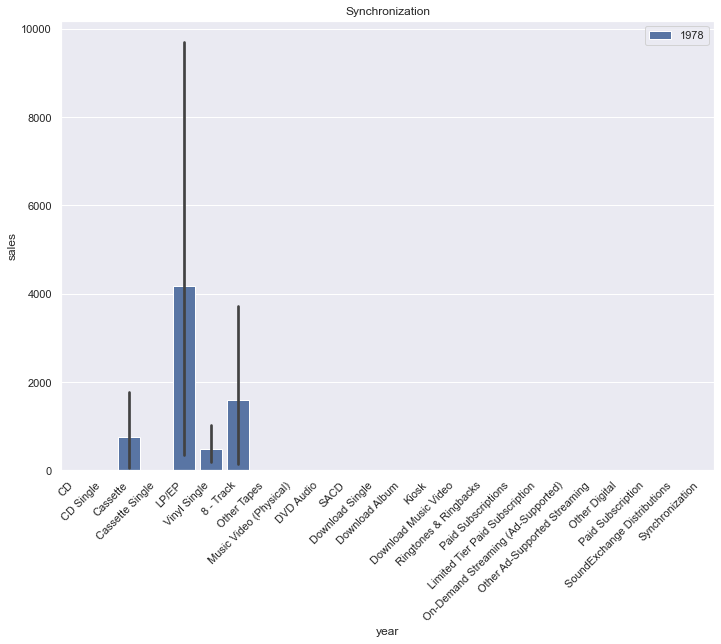

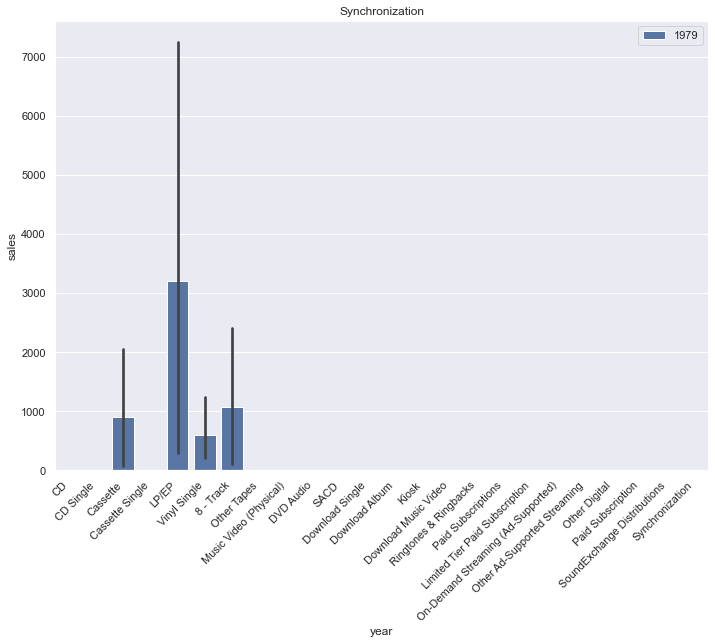

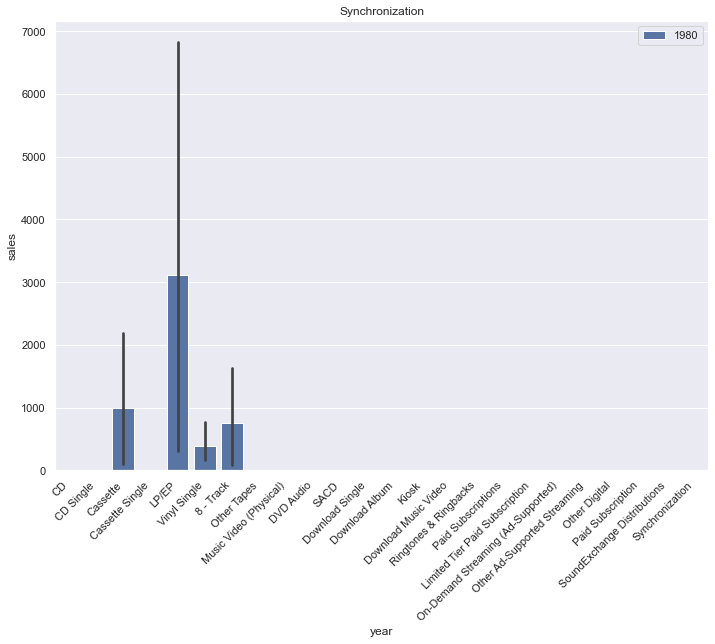

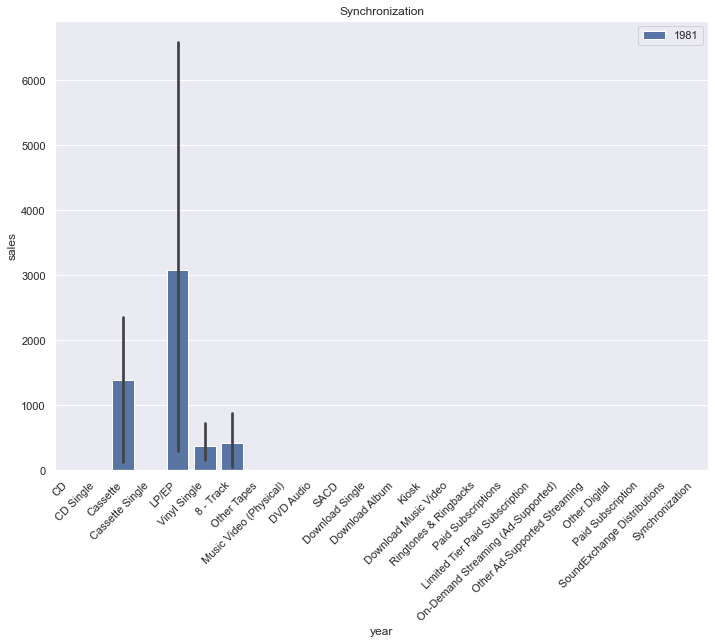

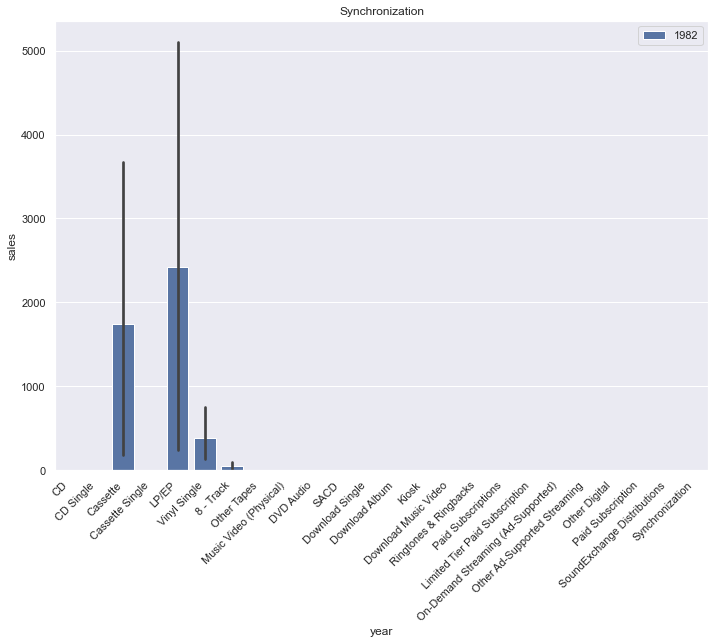

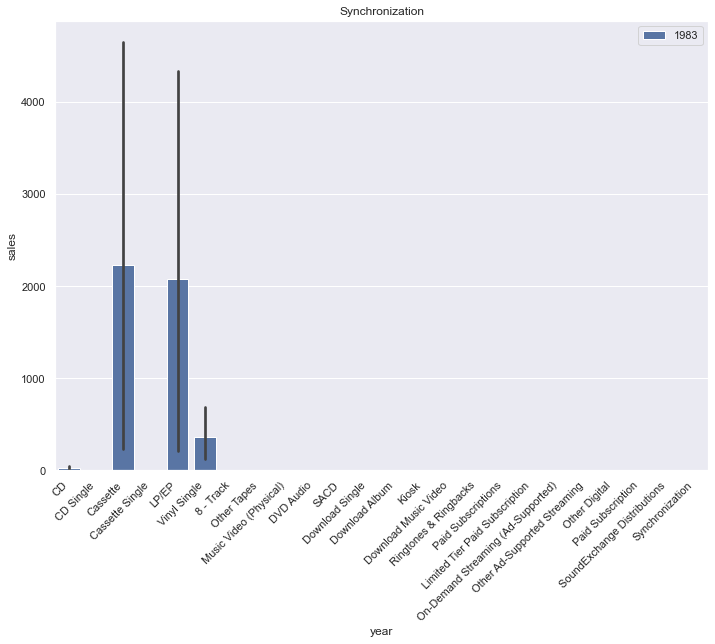

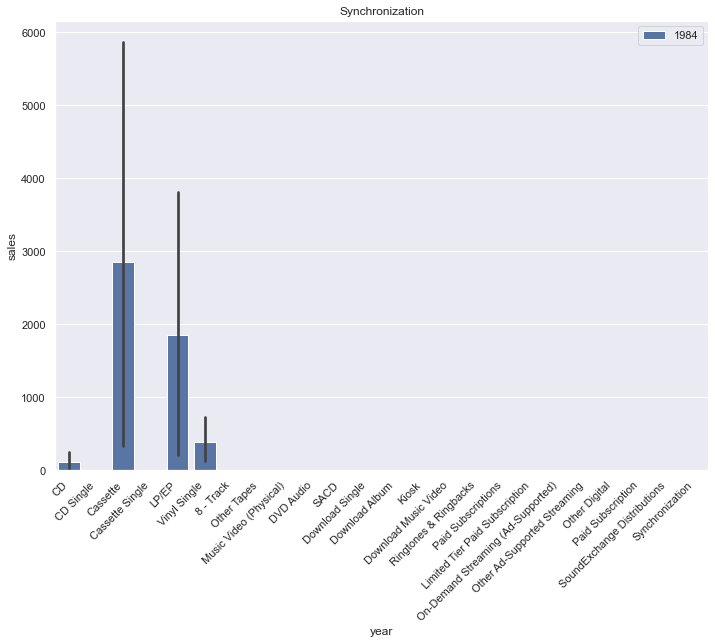

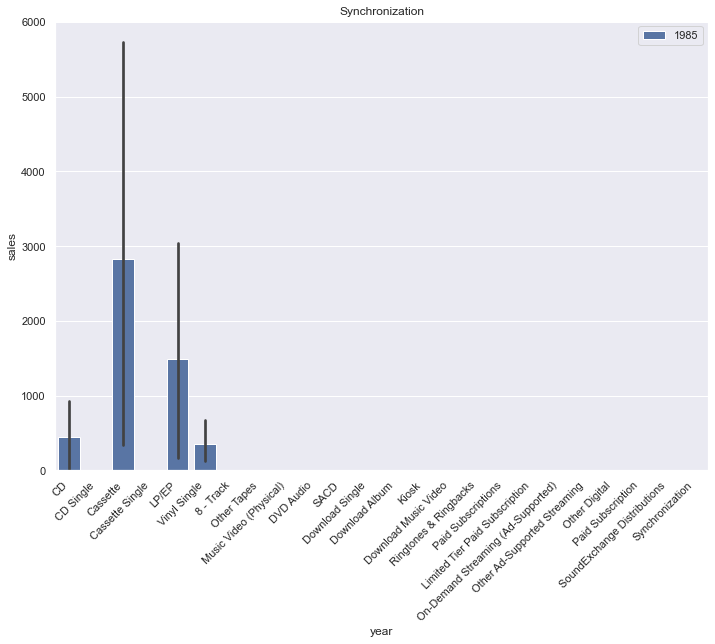

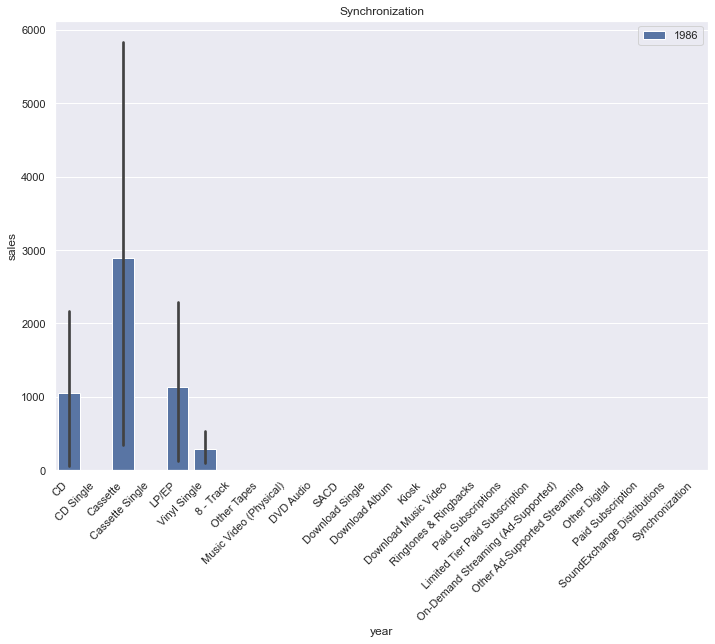

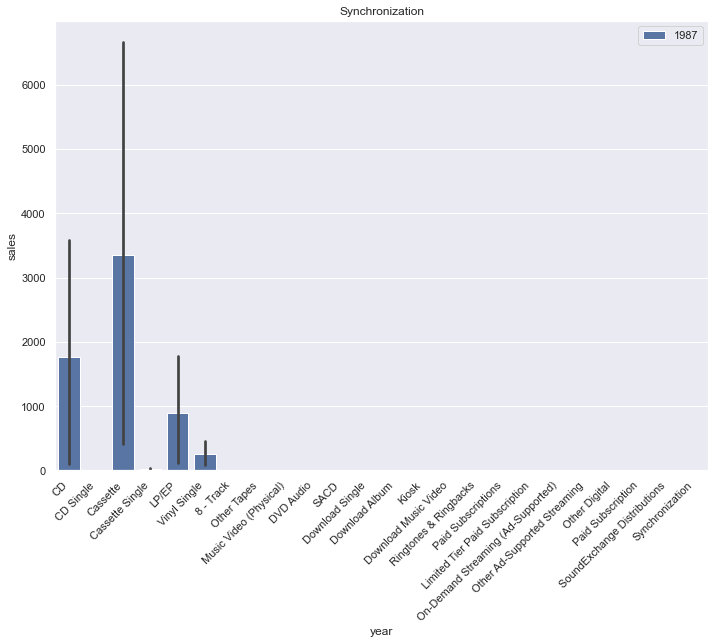

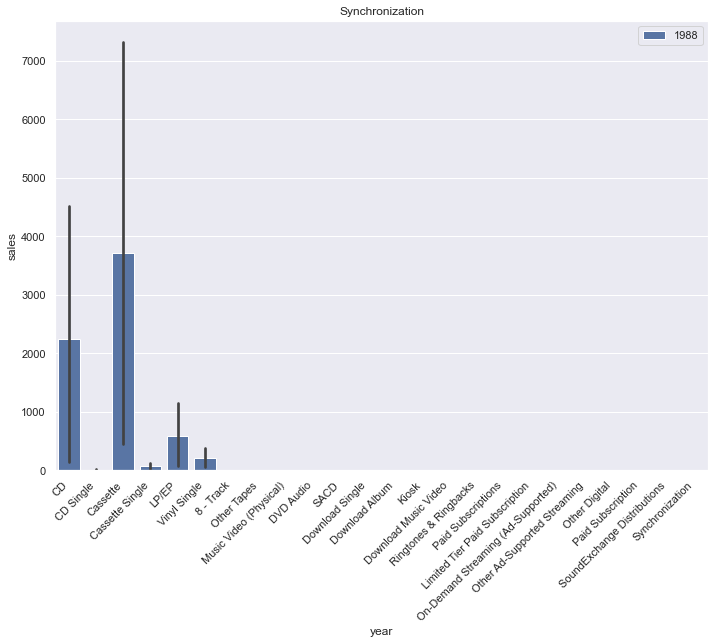

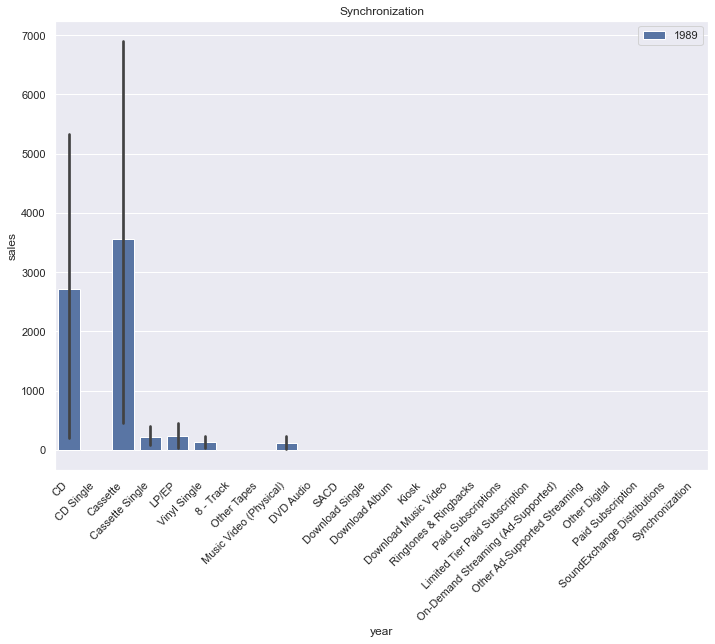

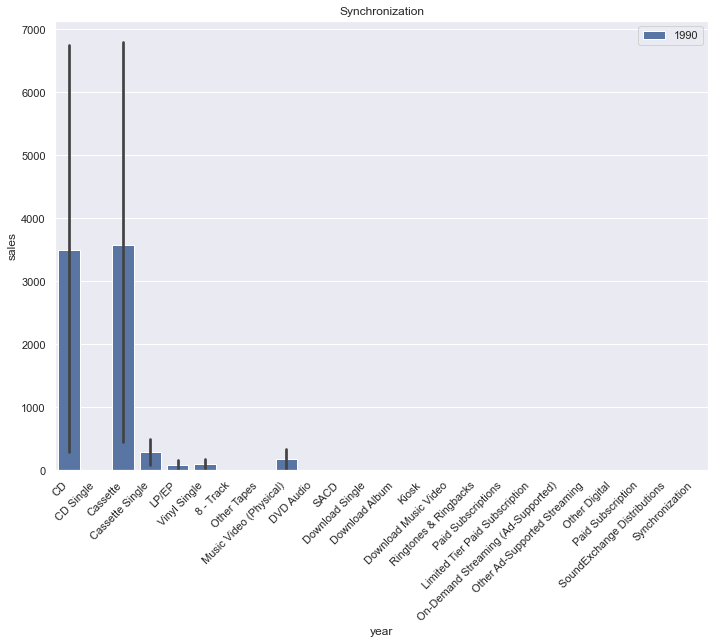

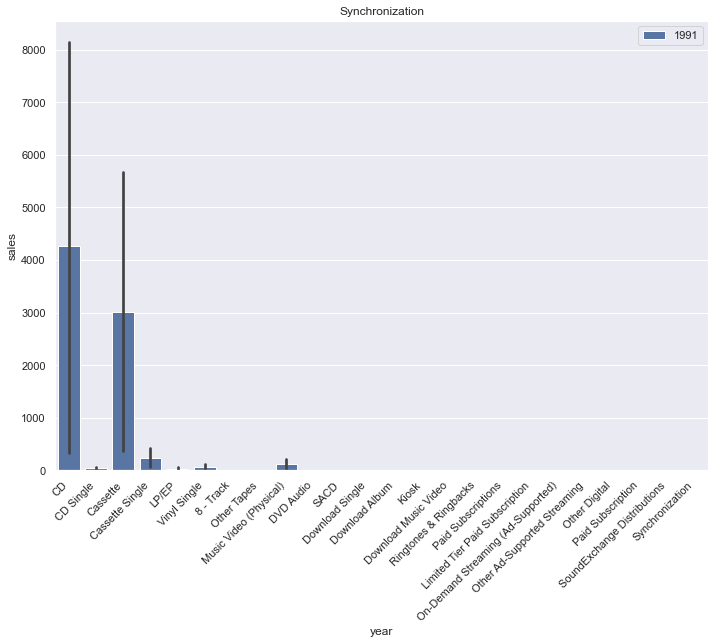

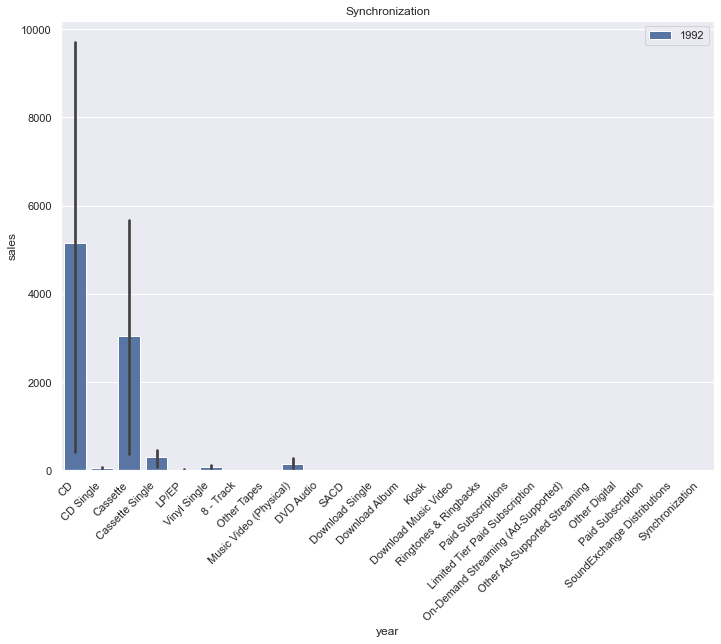

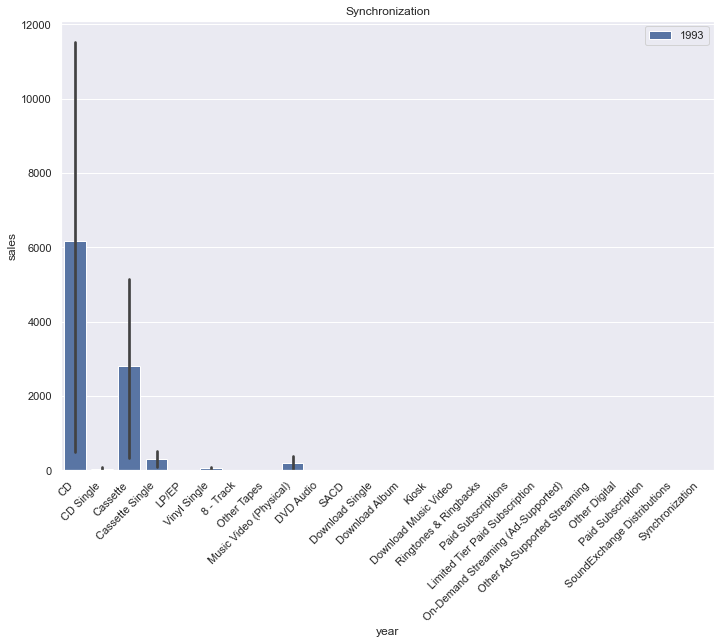

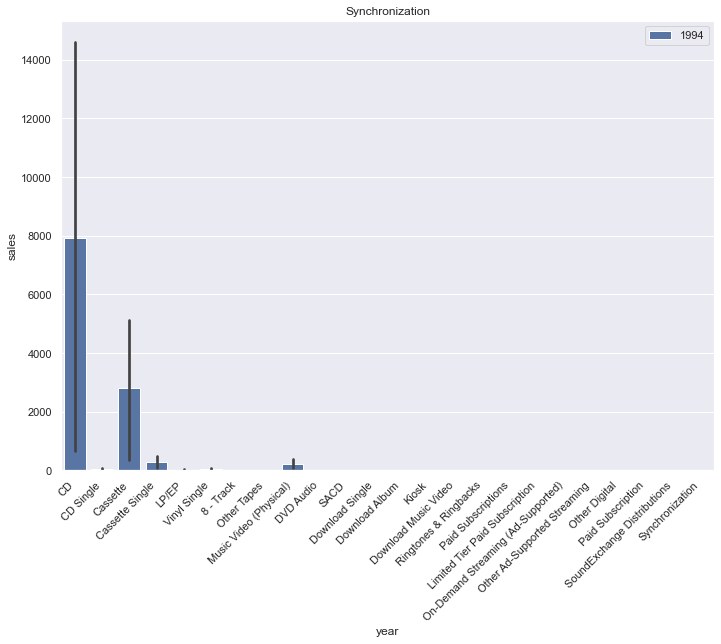

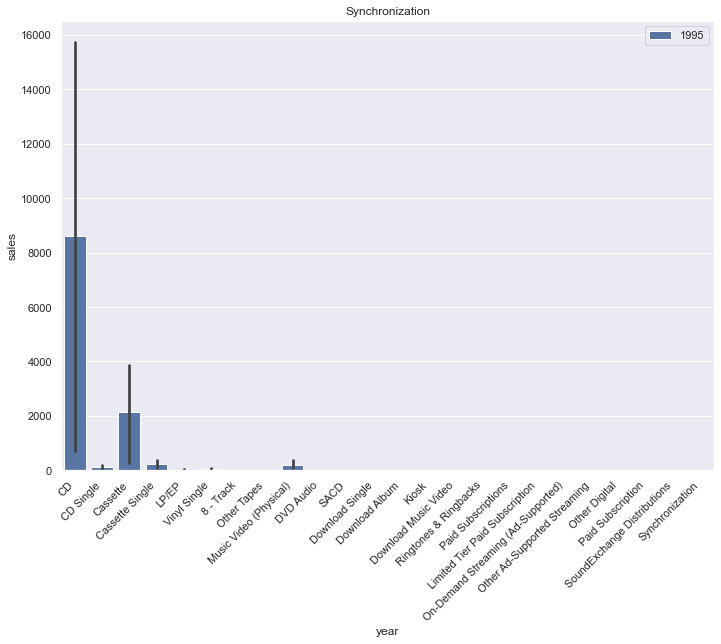

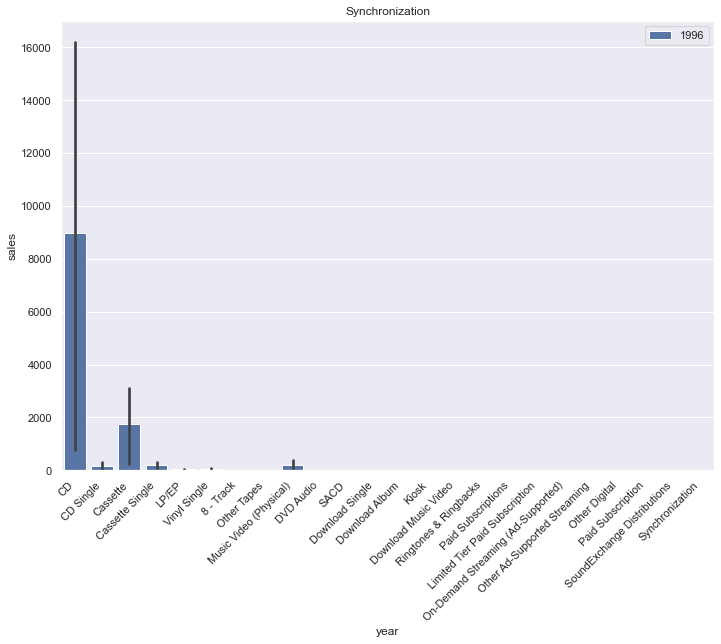

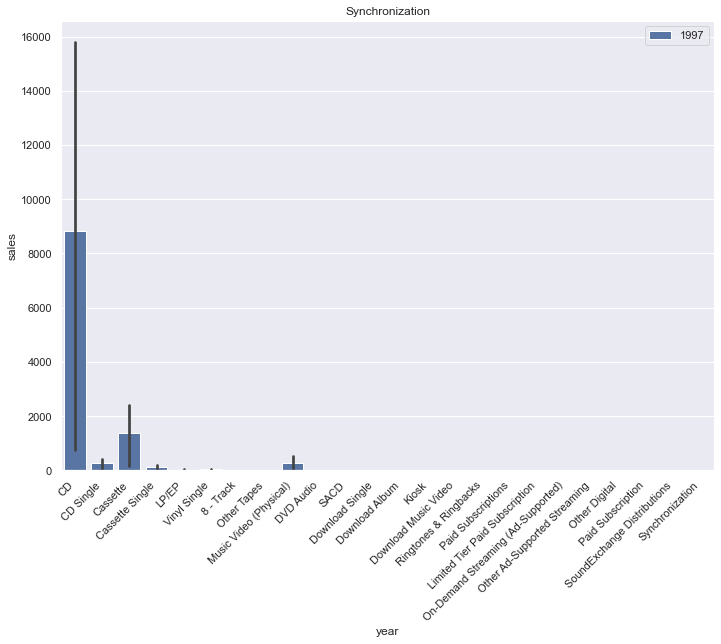

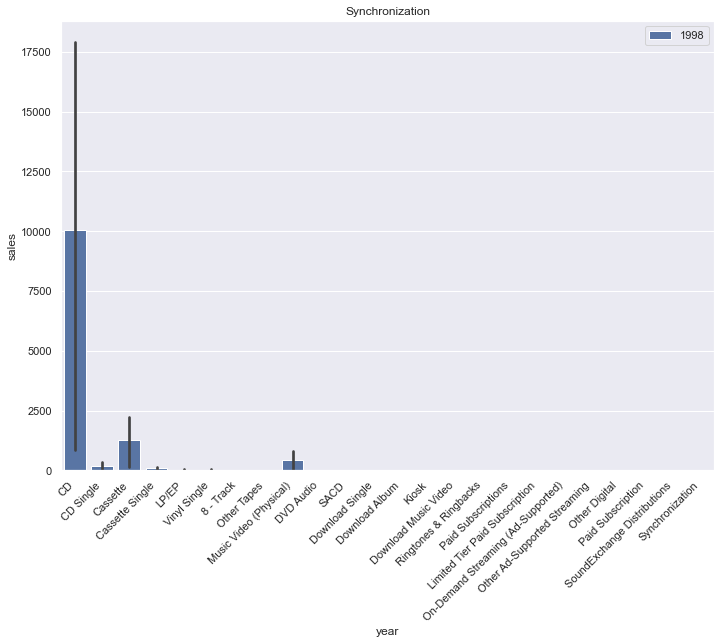

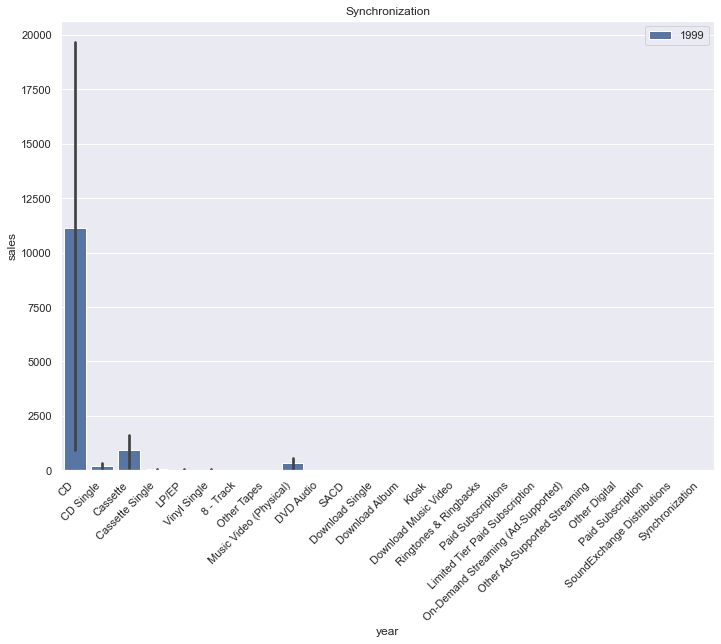

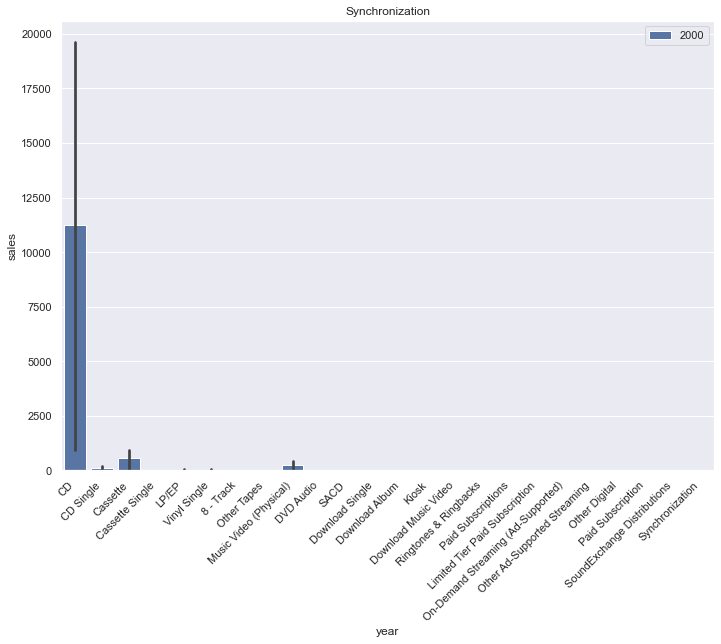

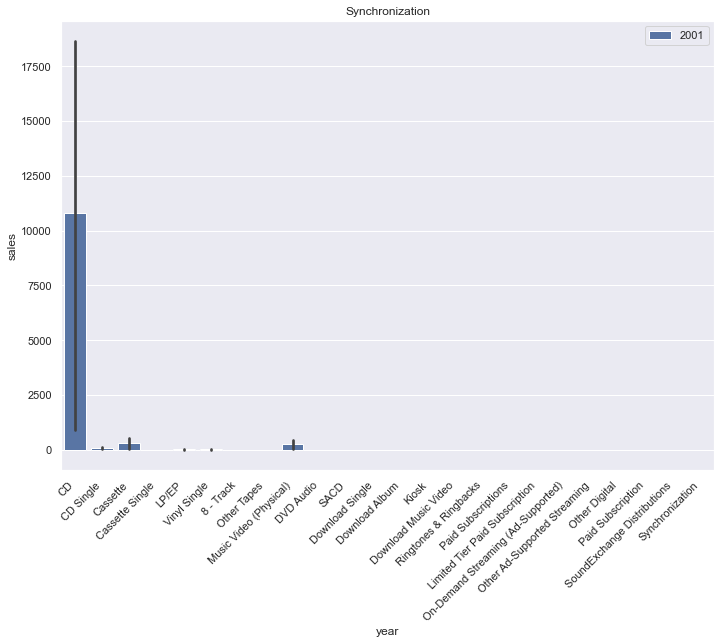

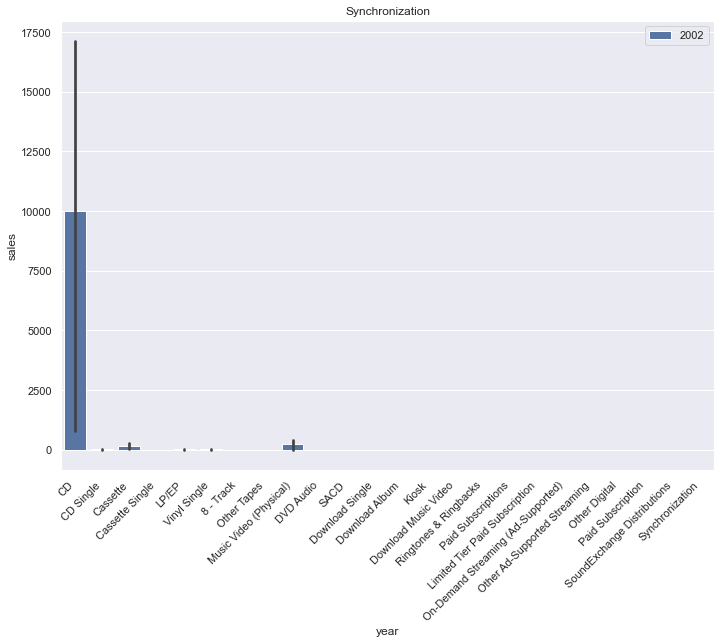

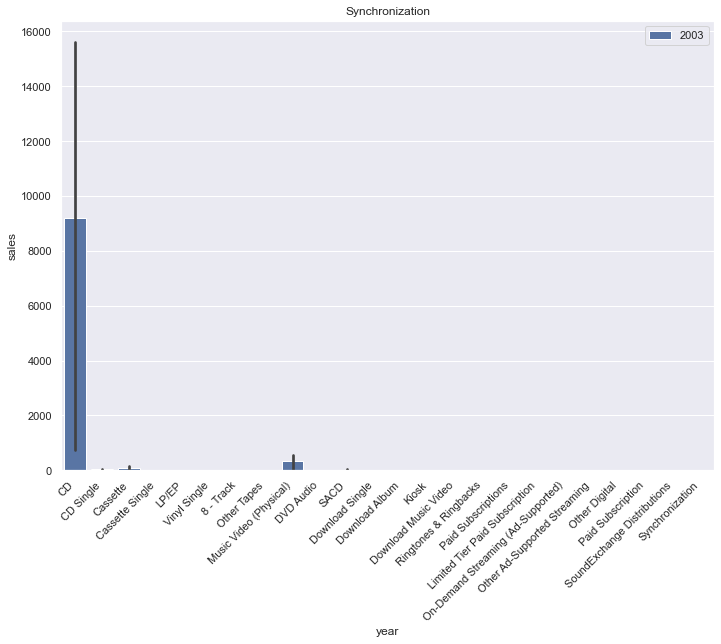

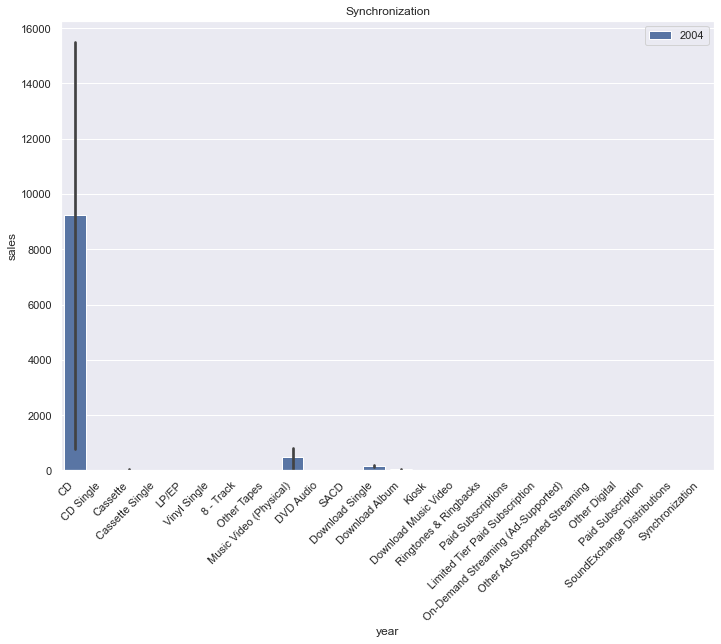

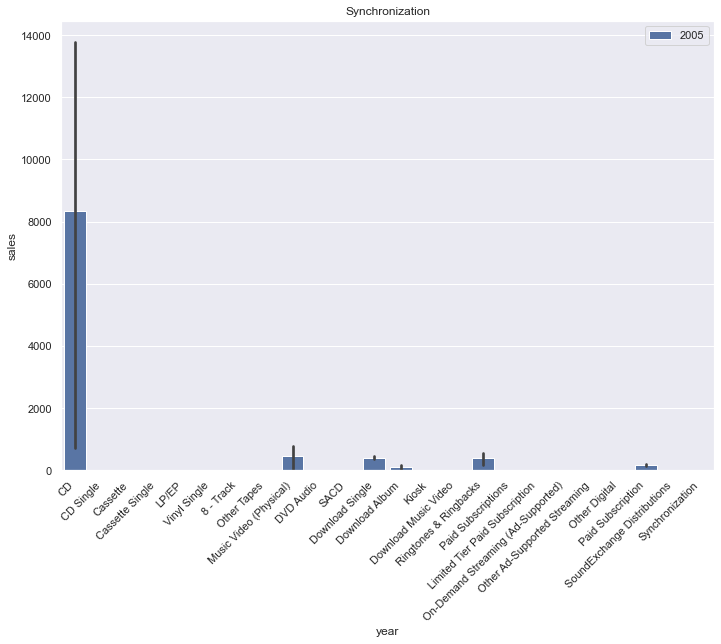

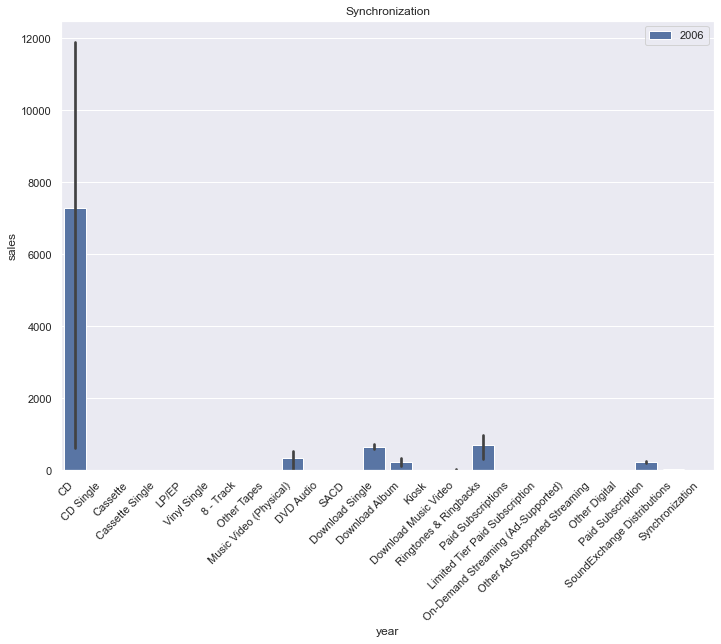

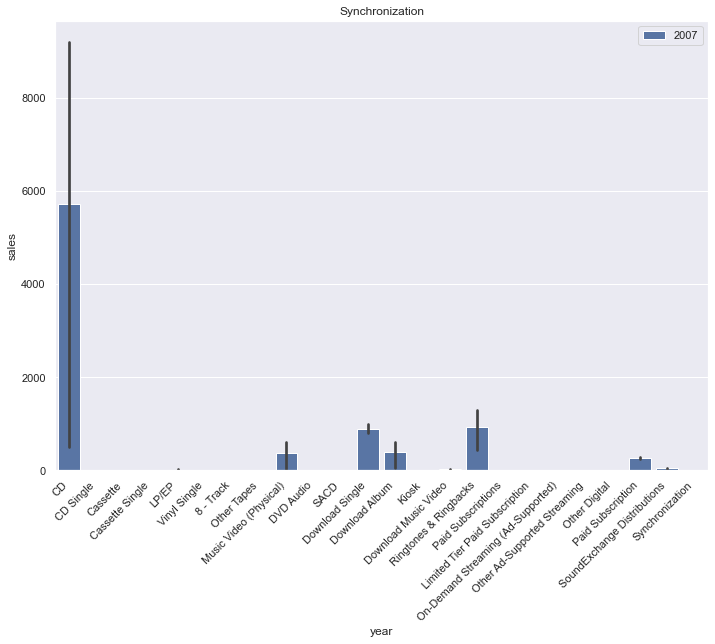

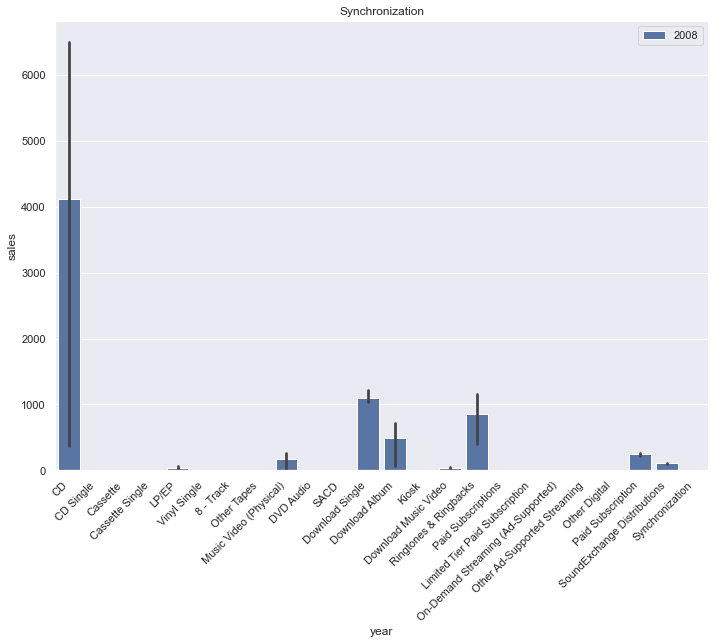

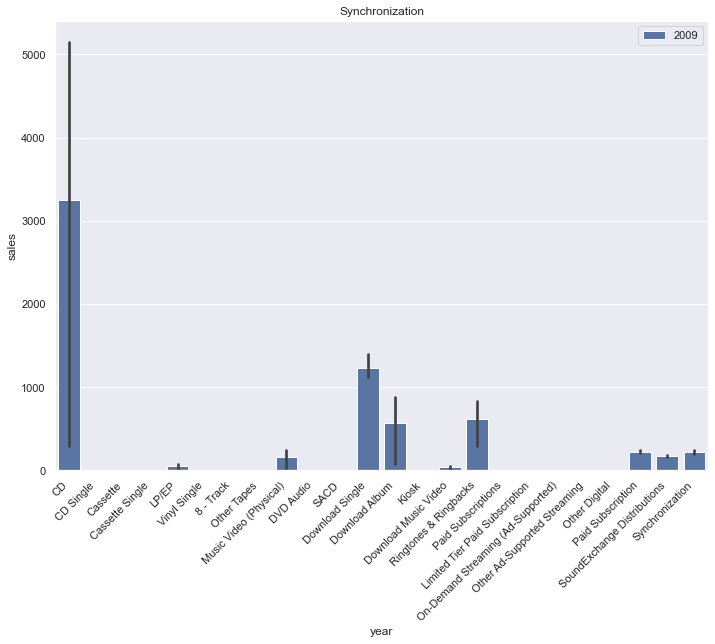

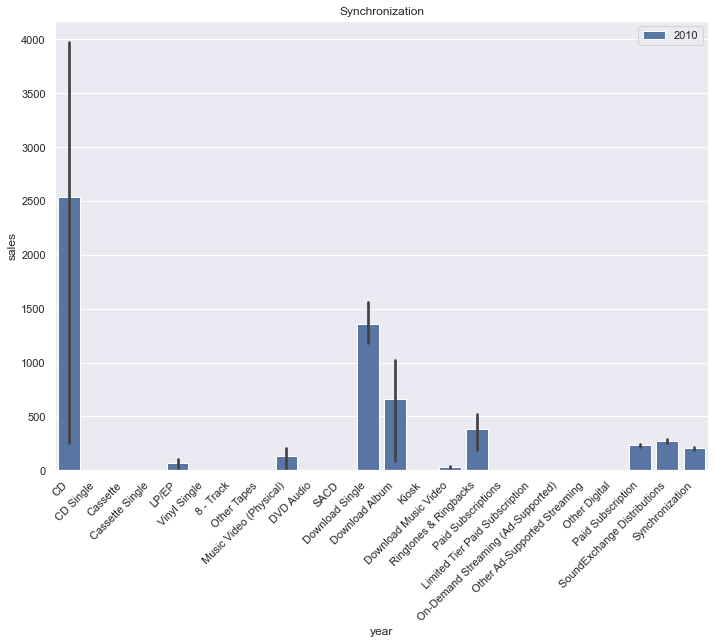

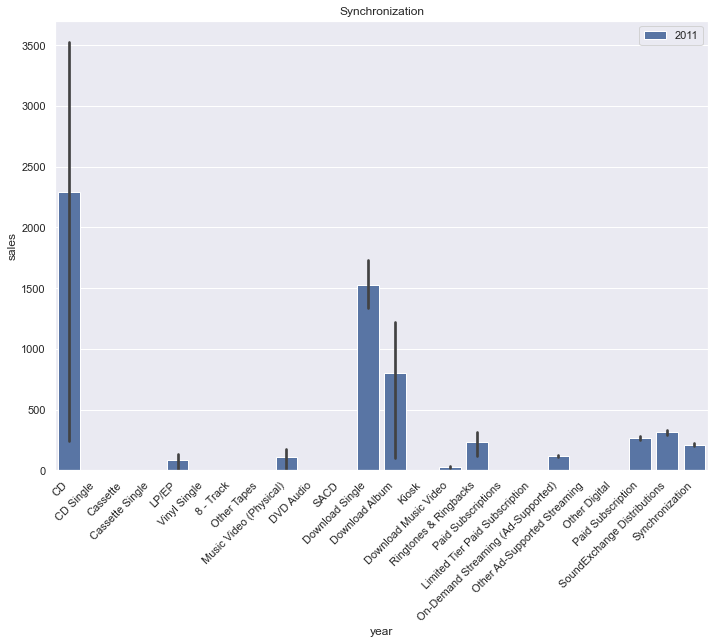

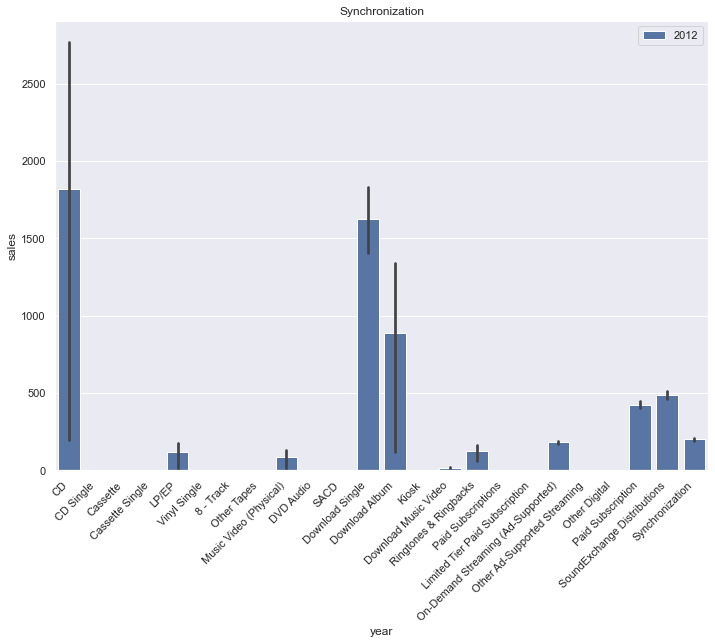

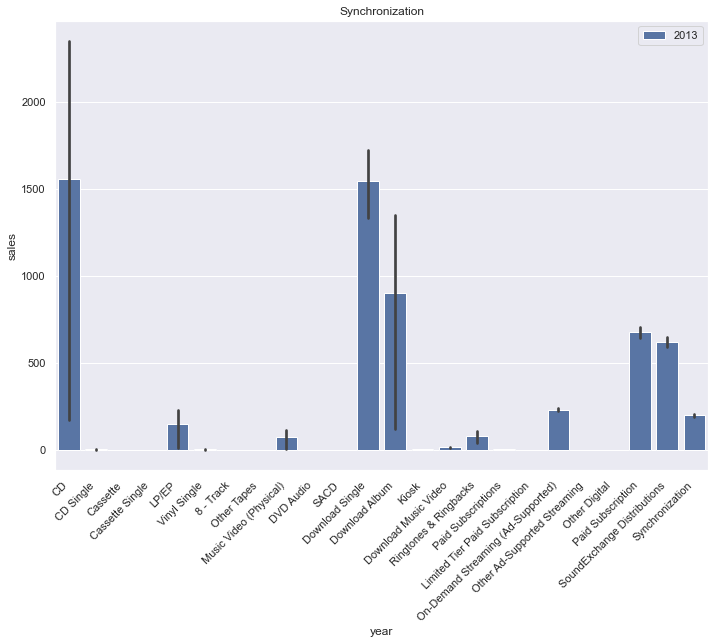

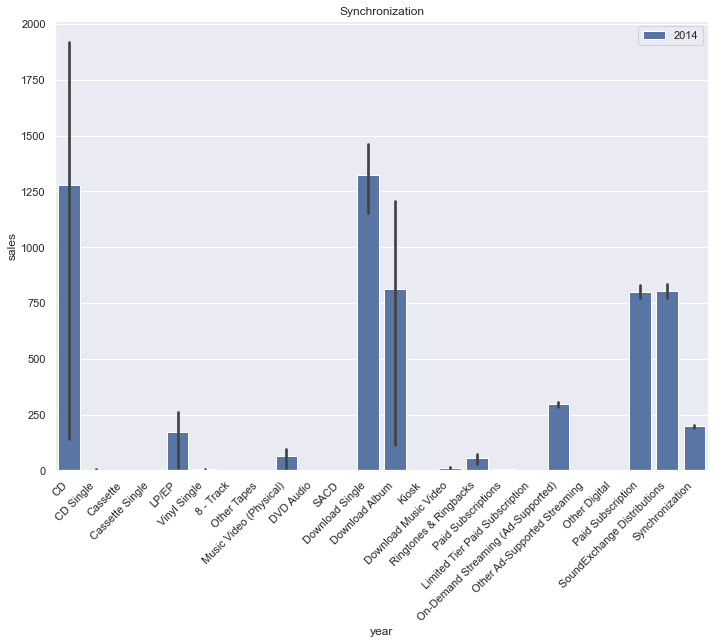

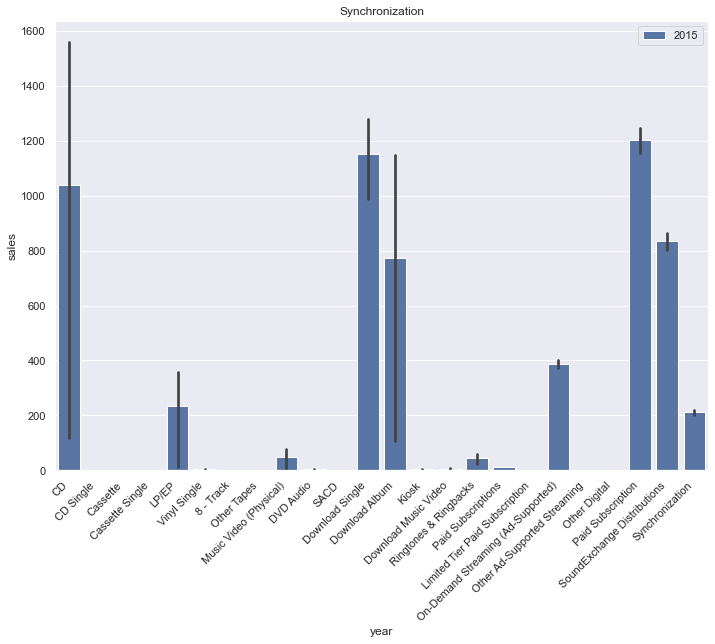

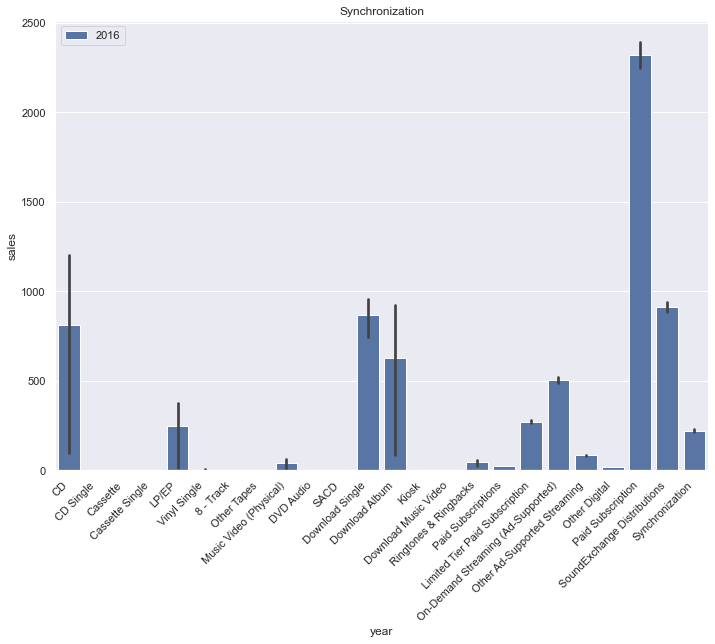

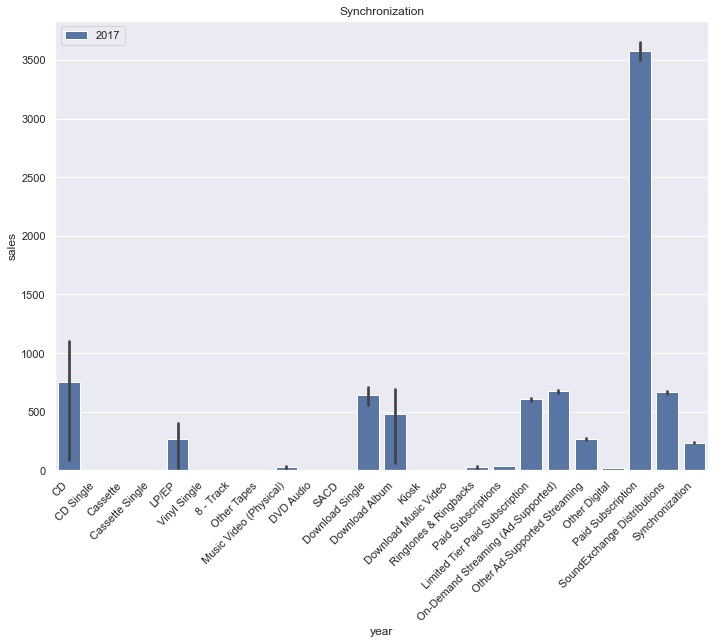

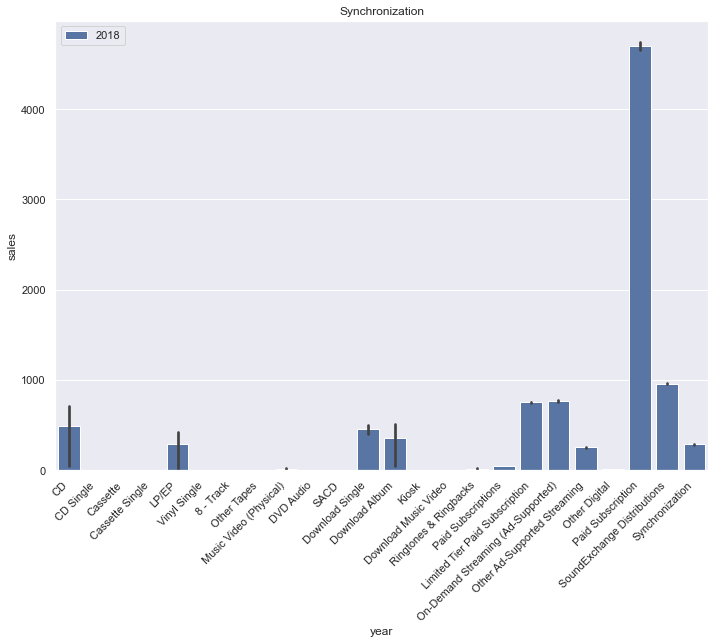

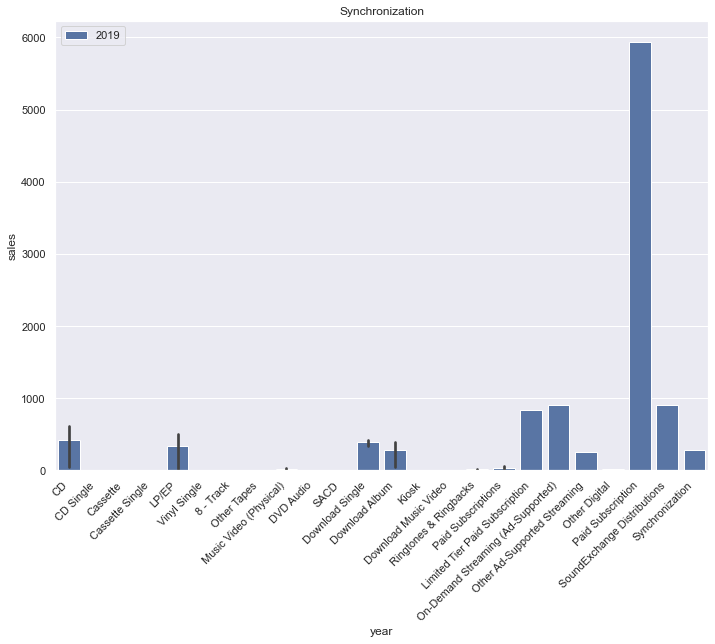

In [26]:
for m in clean_data.year.unique():
    fig, yr = plt.subplots()
    x1=sns.barplot(data=clean_data[(clean_data["year"] == m)], x="format", y="value_actual",hue="year")
    legend = yr.legend()
    plt.title(j)
    plt.xlabel("year")
    plt.ylabel("sales")
    x1.set_xticklabels(x1.get_xticklabels(), rotation=45, horizontalalignment='right')
    plt.show()

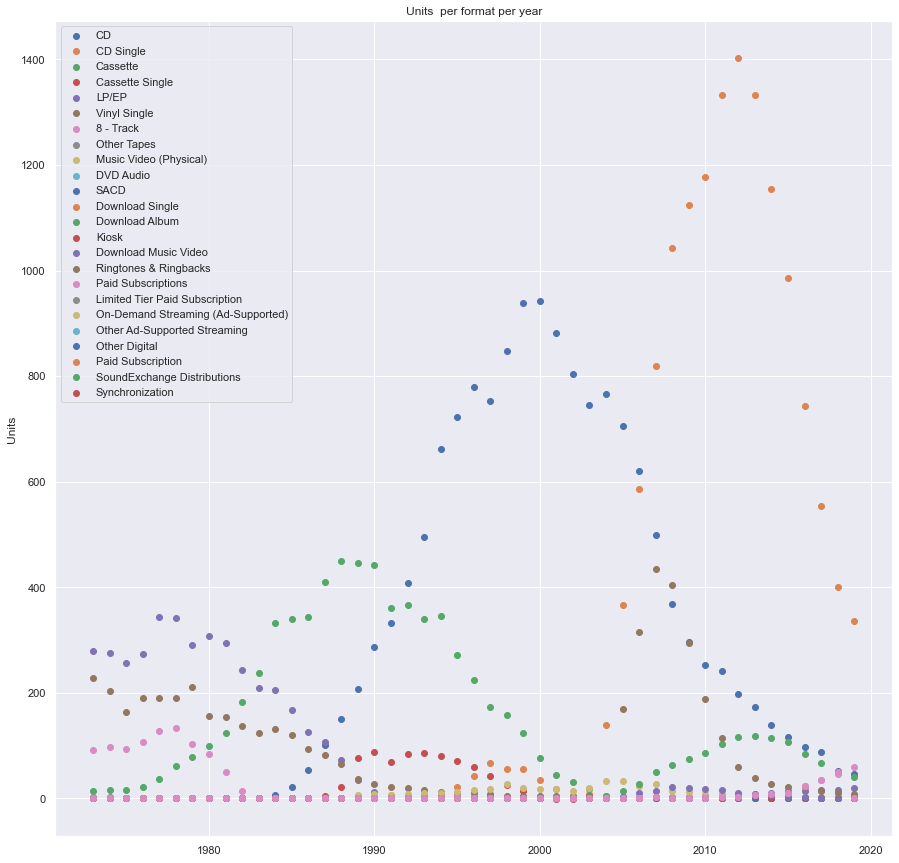

In [32]:
fig,tl = plt.subplots(figsize=(15,15))
for r in clean_data.format.unique():
    tl.scatter(clean_data[(clean_data.format == r) & (clean_data.metric == "Units")]["year"], clean_data[(clean_data.format == r) & (clean_data.metric == "Units")]["value_actual"], label = r)

tl.set_ylabel('Units')
tl.set_title('Units  per format per year')
tl.legend()
plt.show()

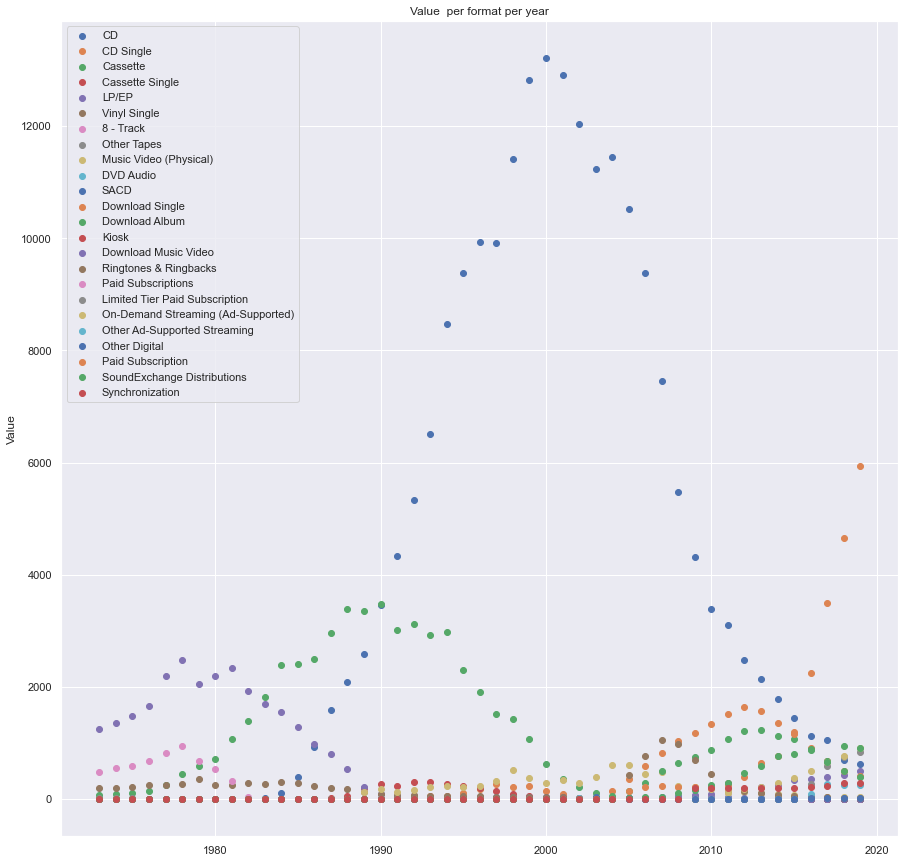

In [33]:
fig,tl = plt.subplots(figsize=(15,15))
for p in clean_data.format.unique():
    tl.scatter(clean_data[(clean_data.format == p) & (clean_data.metric == "Value")]["year"], clean_data[(clean_data.format == p) & (clean_data.metric == "Value")]["value_actual"], label = p)

tl.set_ylabel('Value')
tl.set_title('Value  per format per year')
tl.legend()
plt.show()

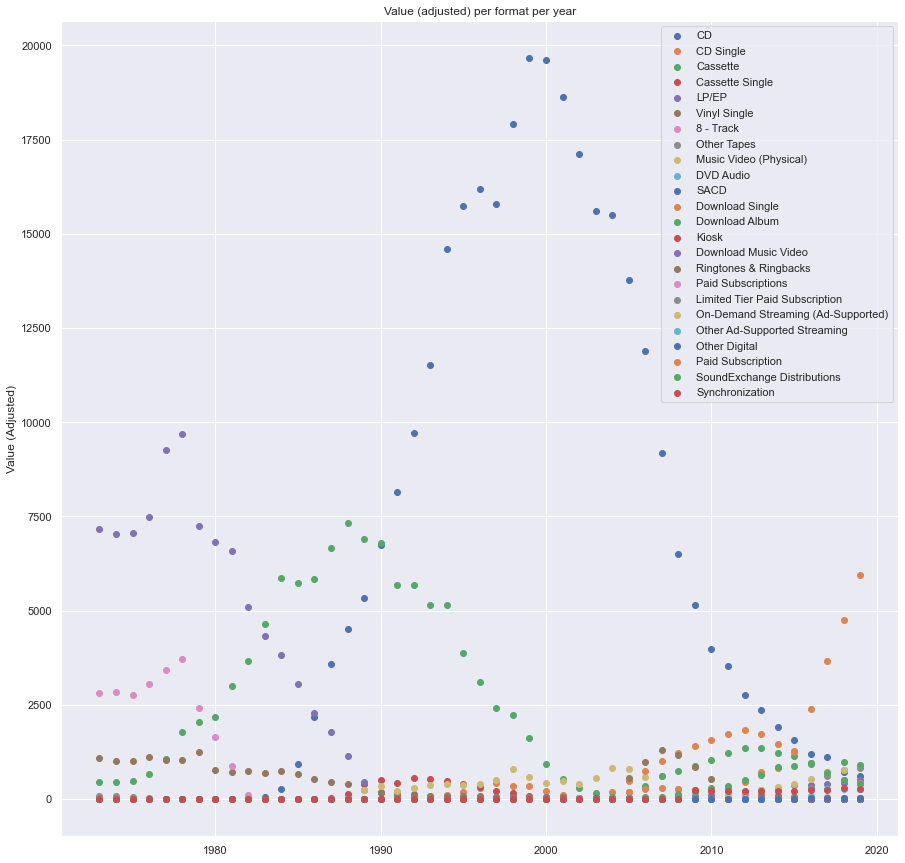

In [34]:
fig,tl = plt.subplots(figsize=(15,15))
for n in clean_data.format.unique():
    tl.scatter(clean_data[(clean_data.format == n) & (clean_data.metric == "Value (Adjusted)")]["year"], clean_data[(clean_data.format == n) & (clean_data.metric == "Value (Adjusted)")]["value_actual"], label = n)

tl.set_ylabel('Value (Adjusted)')
tl.set_title('Value (adjusted) per format per year')
tl.legend()
plt.show()